In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno

import copy

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from IPython.display import Markdown as md

df = pd.read_pickle('POST_B8_data_385k.pkl', compression='zip')

categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]

float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

int_cols = [column for column in df.columns if df.dtypes[column] == 'int']

In [2]:
pd.set_option('display.max_columns', 500)


What we are going to study is about classic burgers and vegan burgers.
-------------------------------------------------------------------------
The first idea was to study different kind of wine with the keyword 'Chateau' but the dataset does not have enought feature like acidity, tanin, phenols etc.
--------------------------------------------------------------------------------------------------------------------------------------------------------------
The second idea was to work on cheeses , but this keyword is everywhere , very difficult to work on it .
-------------------------------------------------------------------------------------------------------
Finally , working on burgers was really great, a lot of datas extractable, 'fun' to display after process.
------------------------------------------------------------------------------------------------------------
Burger is a very common product in industrial food so the it should be have enough entries to get reliable statistic.
----------------------------------------------------------------------------------------------------------------------
The product is famous, so it is easy to get an idea about the following work.
------------------------------------------------------------------------------
With emergence of healthy food wave, the question was to see if it is only a marketing strategy or if it really delivers the goods.
-----------------------------------------------------------------------------------------------------------------------------------

Tasks organization:
====================

1- seeking for keywords 'Vegan', 'vegan', 'Veggie', 'veggie', 'Vegetal', 'vegetal' . We work only with the english product name column in this demonstration.
---------------------------------------------------------------------------------------------------------------------------------------------------------------

2- seeking for keywords 'Bugers', 'burgers', 'Burger', 'burger'. We work only with the english product name column in this demonstration.
---------------------------------------------------------------------------------------------------------------------------------------------------------------

3- study main nutrients composition difference between classic versus vegan burgers : macro nutrients, fiber and salt per hundreds.
---------------------------------------------------------------------------------------------------------------------------------------------------------------

4- study fatty acid composition difference between classic versus vegan burgers. Trans fatty acid and saturated fatty acid are correlated with cardiovascular diseases.
---------------------------------------------------------------------------------------------------------------------------------------------------------------

5- study Highly and Moderate toxic additives proportions difference between classic versus vegan burgers
--------------------------------------------------------------------------------------------------------

6- study allergens difference between classic versus vegan burgers
------------------------------------------------------------------

In [3]:
for col in df.columns:
    print(col)

calcium_per_hundred
carbohydrates_per_hundred
cholesterol_per_hundred
copper_cu_per_hundred
energy_per_hundred
fat_per_hundred
fatty_acids_total_saturated_per_hundred
fatty_acids_total_trans_per_hundred
fiber_insoluble_per_hundred
fiber_per_hundred
fiber_soluble_per_hundred
folate_total_per_hundred
folic_acid_per_hundred
iron_per_hundred
magnesium_per_hundred
manganese_mn_per_hundred
monounsaturated_fatty_acids_per_hundred
phosphorus_per_hundred
polyunsaturated_fatty_acids_per_hundred
potassium_k_per_hundred
protein_per_hundred
salt_per_hundred
saturated_fat_per_hundred
sodium_per_hundred
sugars_added_per_hundred
sugars_per_hundred
vitamin_a_iu_per_hundred
vitamin_b12_cobalamin_per_hundred
vitamin_b1_thiamin_per_hundred
vitamin_b2_riboflavin_per_hundred
vitamin_b3_niacin_per_hundred
vitamin_b5_panthothenic_acid_per_hundred
vitamin_b6_pyridoxin_per_hundred
vitamin_c_ascorbic_acid_per_hundred
vitamin_d_d2_d3_international_units_per_hundred
zinc_per_hundred
macros_saltfiber_sum
product_na

TASK 1 :  seeking for keywords
--------

In [4]:
mask_veg = df.product_name_en.str.contains('Vegan') | df.product_name_en.str.contains('vegan') | df.product_name_en.str.contains('Veggie') | df.product_name_en.str.contains('veggie') | df.product_name_en.str.contains('Vegetal') | df.product_name_en.str.contains('vegetal')



df_vegan = df[mask_veg]

df_vegan.shape
df_vegan.shape[0]

nb_entries_vegan = df_vegan.shape[0]


In [5]:
md(f"<h2><center><strong>We find<font color='red'> {df_vegan.shape[0]} </font>entries tagged vegan, dont know yet how many of them are burgers</strong></center></h2>")

<h2><center><strong>We find<font color='red'> 188 </font>entries tagged vegan, dont know yet how many of them are burgers</strong></center></h2>

In [6]:
print("Index                                                   product name (english)")
print("========= + ================================================================================ \n")

df_vegan.product_name_en

Index                                                   product name (english)
========= + ================================================================================ 



295                     Alnatura: Flakes & Hazelnuts: Vegan
3403                      Ramirez Sardinhas em óleo vegetal
5326        Veganz : Goji berries in dark chocolate : vegan
5327              Veganz : Coconut crunch in dark chocolate
5328        Veganz : Beeren-Mix : Berries in dark chocolate
                                ...                        
374607    The Vegan Society - Veg1, 180 Multivitamin Che...
374705                             Sproud vegan milk (peas)
374713           Migros V-Love - Plant-Based hummus veggies
374738                 Fit Food - Vegan Deli (Mixed Garden)
374846                             Vemondo - Vegan Topping 
Name: product_name_en, Length: 188, dtype: object

Getting an idea of what is sold as "vegan / veggie / vegetal" (not only burgers):
--------------------------------------------------------------------------------

In [7]:
for name_veg in df_vegan.product_name_en:
    print(name_veg)

Alnatura: Flakes & Hazelnuts: Vegan
Ramirez Sardinhas em óleo vegetal
Veganz : Goji berries in dark chocolate : vegan
Veganz : Coconut crunch in dark chocolate
Veganz : Beeren-Mix : Berries in dark chocolate
Veganz : Crunchy balls in dark chocolate : vegan
Veganz : Cashews in dark chocolate
Veganz Lemon biscuits vegan
Veganz : Almonds in dark chocolate : vegan
Veganz : Choco Biscuits : vegan
Veganz : Marbled biscuits : vegan
Veganz : Hazelnut Brittle : Rice Choc : vegan
Veganz : Wafer Crunch : vegan
Veganz : Strawberry Crisp : vegan
Veganz : Biscuit with butter flavour : vegan
Veganz : Coconut Flakes : vegan
Veganz : Sandwich biscuits : vegan
Veganz : Sour Mix : vegan
Veganz : Gummy Bears : vegan
Veganz : Fruity mix
Veganz : Cocoa Maca : vegan
Veganz : Fizzy Cola : vegan
Veganz : Inca Goji Raspberry : vegan
Emmi Aktifit Veggie & Fruit Summer Edition
coop Qualité & Prix soya freeze vegan ice vanille
The Green Fairy Chocolate-ChipBio Vegan
Ristorante: Pizza vegetale
Biotta Veggie Spelled

Now we want to have a look on all kind of burgers 
-------------------------------------------------

In [8]:
mask_burger = df.product_name_en.str.contains('Burger') | df.product_name_en.str.contains('burger') | df.product_name_en.str.contains('Burgers') | df.product_name_en.str.contains('burgers') 

df_burger = df[mask_burger]

In [9]:
md(f"<h2><center><strong>We find<font color='red'> {df_burger.shape[0]} </font>entries tagged burger, dont know yet how many of them are vegan</strong></center></h2>")

<h2><center><strong>We find<font color='red'> 190 </font>entries tagged burger, dont know yet how many of them are vegan</strong></center></h2>

In [10]:
for name_burger in df_burger.product_name_en:
    print(name_burger)

Top's cuisine Burgers
Coop Quality & Prix Hamburger Buns
COOP Qualite & Prix Hamburger Buns
Proceli Nutrition Gluten Free Burger
Coop Qualité & Prix Mega Burger Buns
Beef burger-Box
Coop naturaplan hamburger
coop Qualité & Prix Hamburger
Findus Farmburger Beef
Coop Hamburger smokey
Coop Hamburger
Bell Burger Chicken
Dr.Oetker Pizzaburger Devil
Marie Extreme Fluffy Crousti The American Burger Sauce
Dr.Oetker Pizzaburger Hot Dog
Dr.Oetker Pizzaburger Speciale
Coop Prix Garantie Chicken burger
coop PR!X Garantie Swiss beefburger
Wilmersburger Scheiben Classic Slices
Wilmersburger herbs Oregano-Thyme
Wilmersburger Pizza Shreds
M Classic Hamburger sauce
Alnatura Burger with Moroccan cereals
M Classic Hamburger Pizza
Hamburger 8 x 90g
Hamburger Spicy
Hamburger
Cheeseburger Gruyère AOP meat of beef
Pouletburger 4 x90g carne di pollo
Simmental Burger Beef
XL Burger 4 x 140g beef
Angus burger
Wagyu burger
Iberico burger
Beefburger
Chicken burger
Deer burger
Kebab Hamburger
Terrasuisse Spicy bee

In the previous result, we did get all kind of burgers : vegan and those with meat inside
------------------------------------------------------------------------------------------

In [11]:
fatty_acids_without_sum = ["fatty_acids_total_saturated_per_hundred","fatty_acids_total_trans_per_hundred","monounsaturated_fatty_acids_per_hundred","polyunsaturated_fatty_acids_per_hundred"]

df_burger['sum_all_fatty_acids']=df_burger[fatty_acids_without_sum].sum(axis=1)

df_burger

/tmp/ipykernel_5204/3340127526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger['sum_all_fatty_acids']=df_burger[fatty_acids_without_sum].sum(axis=1)


,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,product_name_en,product_name_de,product_name_fr,ingredients_en,created_at,country,sum_all_fatty_acids
68,NaN,15.10,NaN,NaN,509.00,3.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.20,0.83,1.3,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.03,Top's cuisine Burgers,Top's cuisine Burgers,Top's cuisine Burgers,cooked rice water rice rapeseed oil sunflower...,2016-06-03T10:34:06.497Z,CH,0.00
3182,NaN,47.00,NaN,NaN,1190.00,6.00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,1.00,0.5,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.00,Coop Quality & Prix Hamburger Buns,NaN,NaN,NaN,2016-07-13T20:04:34.595Z,CH,0.00
3183,NaN,49.00,NaN,NaN,1170.00,4.50,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,1.00,0.5,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.50,COOP Qualite & Prix Hamburger Buns,NaN,NaN,NaN,2016-07-13T20:04:59.059Z,CH,0.00
3185,NaN,45.00,NaN,NaN,1048.00,5.90,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,1.10,3.3,NaN,NaN,6.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.40,Proceli Nutrition Gluten Free Burger,NaN,NaN,NaN,2016-07-13T20:05:12.914Z,CH,0.00
3957,NaN,48.00,NaN,NaN,1170.00,5.00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,1.00,0.5,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.00,Coop Qualité & Prix Mega Burger Buns,Coop Qualité & Prix Mega Burger Spezialbrot,Coop Qualité & Prix Mega Burger Pain spéciale,NaN,2016-07-14T20:04:10.971Z,CH,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306153,0.0,0.00,59.0,NaN,1230.10,35.29,11.76,0.00,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,35.29,NaN,NaN,2.94,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,70.58,Jim's Astro Burgers Hardwood Smoked Sugar Cure...,NaN,NaN,Water salt sugar sodium phosphate sodium eryth...,2021-04-26T10:22:07.038Z,US,11.76
366252,0.0,1.06,106.0,NaN,891.19,14.89,3.72,NaN,NaN,0.0,NaN,NaN,NaN,2.13,NaN,NaN,NaN,188.0,NaN,291.0,19.15,NaN,NaN,0.48,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,35.10,Chicken Burger FC Gluten Free All Natural* Wit...,NaN,NaN,INGREDIENTS CHICKEN DARK MEAT SEASONING SALT D...,2021-04-26T10:22:53.196Z,US,3.72
366321,0.0,1.77,102.0,NaN,887.01,14.16,3.54,NaN,NaN,0.0,NaN,NaN,NaN,1.77,NaN,NaN,NaN,185.0,NaN,285.0,18.58,NaN,NaN,0.47,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,34.51,"Chicken, Fully Cooked Flame-Grilled Quarter Po...",NaN,NaN,INGREDIENTS DARK CHICKEN SEASONING SALT DRIED ...,2021-04-26T10:22:53.196Z,US,3.54
371021,35.0,28.32,0.0,NaN,1184.07,NaN,14.16,1.77,NaN,15.9,NaN,0.0,NaN,2.39,0.0,NaN,NaN,NaN,NaN,0.0,10.62,NaN,NaN,0.43,NaN,2.65,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,38.94,"Sunshine Burger, FS Shiitake Mushroom, Organic...",NaN,NaN,ORGANIC COOKED BROWN RICEORGANIC GROUND RAW SU...,2021-04-26T10:23:00.932Z,US,15.93


Now we select vegan labeled product from the all kind burger dataframe.
------------------------------------------------------------------------

In [12]:
mask_vegan = df_burger.product_name_en.str.contains('Vegan') | df_burger.product_name_en.str.contains('vegan') | df_burger.product_name_en.str.contains('Veggie') | df_burger.product_name_en.str.contains('veggie') | df_burger.product_name_en.str.contains('Vegetarian') | df_burger.product_name_en.str.contains('vegetarian') 

df_burger_vegan = df_burger[mask_vegan]



In [13]:
md(f" <h1><center><strong> from <font color='red'> {df_burger.shape[0]} </font> of burgers ,<font color='green'> {df_burger_vegan.shape[0]} </font> of them are labeled vegan , so a ratio of <font color='grey'> {round(100*(df_burger_vegan.shape[0]/df_burger.shape[0]),2)} </font> % </strong></center></h1>")

 <h1><center><strong> from <font color='red'> 190 </font> of burgers ,<font color='green'> 39 </font> of them are labeled vegan , so a ratio of <font color='grey'> 20.53 </font> % </strong></center></h1>

Lets have a look on  burger vegan:
===================================

In [14]:
for name_burger in df_burger_vegan.product_name_en:
    print(name_burger)

Wheat seitan vegan superhero burger
Garden Gourmet - Incredibly Veggie: Incredible burger
Vemondo - Vegetarian burger
Next Level Meat - Next level burger (vegan burger patties)
Wilmersburger - Chili bread topping (Vegan, milk-free)
Wilmersburger - Peppers bread topping (Vegan, milk-free)
Wilmersburger - Slice of mushroom topping, milk-free, vegan
Garden Gourmet - Vegetarian burger 
Gardenburger Veggie Burgers Original 10oz
Gardenburger Veggie Burgers Black Bean Chipotle 10oz
Gardenburger Veggie Burgers Portabella 10oz
Gardenburger Veggie Burgers Original 3.4oz 48ct
Gardenburger Veggie Burgers Black Bean 3.4oz 48ct
Gardenburger Veggie Burgers Veggie Vegan 3.4oz 48ct
Gardenburger Veggie Burgers Original 3.4oz 48ct
Gardenburger Veggie Burgers Classic 2.5oz 48ct
Gardenburger Veggie Burgers Malibu 3.2oz 48ct
Morningstar Farms Veggie Burgers Spicy Black Bean 9.5oz
Morningstar Farms Veggie Burgers Spicy Black Bean 18.9oz
Morningstar Farms Veggie Burgers Garden Veggie Patties 9.5oz
Morningstar

Now we substract the vegan bugers from the all kind burgers dataframe, so we get the classic burger dataframe we will compare versus the vegan one.
----------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
df_burger_classic = df_burger.drop(df_burger_vegan.index)


df_burger_classic.shape

(151, 44)

In [16]:
for name_burger in df_burger_classic.product_name_en:
    print(name_burger)

Top's cuisine Burgers
Coop Quality & Prix Hamburger Buns
COOP Qualite & Prix Hamburger Buns
Proceli Nutrition Gluten Free Burger
Coop Qualité & Prix Mega Burger Buns
Beef burger-Box
Coop naturaplan hamburger
coop Qualité & Prix Hamburger
Findus Farmburger Beef
Coop Hamburger smokey
Coop Hamburger
Bell Burger Chicken
Dr.Oetker Pizzaburger Devil
Marie Extreme Fluffy Crousti The American Burger Sauce
Dr.Oetker Pizzaburger Hot Dog
Dr.Oetker Pizzaburger Speciale
Coop Prix Garantie Chicken burger
coop PR!X Garantie Swiss beefburger
Wilmersburger Scheiben Classic Slices
Wilmersburger herbs Oregano-Thyme
Wilmersburger Pizza Shreds
M Classic Hamburger sauce
Alnatura Burger with Moroccan cereals
M Classic Hamburger Pizza
Hamburger 8 x 90g
Hamburger Spicy
Hamburger
Cheeseburger Gruyère AOP meat of beef
Pouletburger 4 x90g carne di pollo
Simmental Burger Beef
XL Burger 4 x 140g beef
Angus burger
Wagyu burger
Iberico burger
Beefburger
Chicken burger
Deer burger
Kebab Hamburger
Terrasuisse Spicy bee

Now we are curious to compare ,  first we study one by one classical and vegan dataframes, after we will print them side by side:
---------------------------------------------------------------------------------------------------------------------------------

In [17]:
desc_classic = df_burger_classic.describe().copy()

desc_classic

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,sum_all_fatty_acids
count,62.000000,151.000000,62.000000,0.0,89.000000,150.000000,62.000000,58.000000,5.000000,127.000000,5.00000,8.000000,1.0,63.000000,8.000000,0.0,13.000000,7.000000,12.000000,31.000000,151.000000,81.000000,77.000000,62.000000,0.0,136.000000,45.000000,7.000000,5.000000,5.00000,4.000000,0.0,5.000000,49.000000,20.0,8.000000,151.000000,151.000000
mean,29.016129,32.415497,6.145161,NaN,941.414045,9.006800,1.330968,0.068793,1.600000,2.971654,1.80000,30.000000,103.0,2.220794,12.375000,NaN,2.720000,125.571429,2.941667,294.419355,11.405894,1.384074,4.094805,1.305323,NaN,4.417206,207.333333,2.521429,0.600000,0.15600,6.600000,NaN,0.420000,0.863265,0.0,0.362500,53.623576,1.040861
std,37.610380,28.220800,20.157451,NaN,239.552805,7.298711,2.887817,0.286375,1.341641,2.335200,1.30384,73.858939,NaN,1.141893,11.758735,NaN,2.797141,46.722076,4.887799,175.945403,5.454244,0.352593,4.620802,0.635403,NaN,3.806390,432.665418,3.905963,0.547723,0.11929,5.810336,NaN,0.398058,4.286058,0.0,0.311391,22.192864,3.939424
min,0.000000,0.000000,0.000000,NaN,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.0,0.000000,0.000000,NaN,0.000000,64.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.230000,NaN,0.000000,0.000000,0.000000,0.000000,0.02000,0.800000,NaN,0.020000,0.000000,0.0,0.000000,15.410000,0.000000
25%,0.000000,6.900000,0.000000,NaN,798.000000,3.230000,0.000000,0.000000,1.000000,1.200000,1.00000,0.000000,103.0,1.440000,0.000000,NaN,0.400000,99.500000,0.425000,188.000000,8.055000,1.100000,0.900000,0.712500,NaN,1.100000,0.000000,0.000000,0.000000,0.06000,2.000000,NaN,0.090000,0.000000,0.0,0.000000,35.300000,0.000000
50%,0.000000,23.530000,0.000000,NaN,922.000000,6.455000,0.000000,0.000000,1.000000,2.900000,2.00000,0.000000,103.0,2.320000,14.000000,NaN,1.040000,111.000000,1.060000,291.000000,10.000000,1.300000,2.800000,1.465000,NaN,3.515000,0.000000,0.000000,1.000000,0.19000,7.000000,NaN,0.310000,0.000000,0.0,0.500000,43.000000,0.000000
75%,63.000000,68.140000,0.000000,NaN,1141.000000,14.000000,1.350000,0.000000,3.000000,3.600000,3.00000,11.500000,103.0,2.590000,18.000000,NaN,6.200000,158.500000,2.100000,371.000000,16.000000,1.600000,6.000000,1.740000,NaN,6.505000,238.000000,4.725000,1.000000,0.19000,11.600000,NaN,0.840000,0.000000,0.0,0.550000,81.585000,0.000000
max,148.000000,87.100000,106.000000,NaN,1443.480000,36.500000,14.160000,1.770000,3.000000,15.900000,3.00000,212.000000,103.0,5.700000,31.000000,NaN,6.600000,188.000000,14.700000,743.000000,35.290000,2.300000,22.000000,2.940000,NaN,17.140000,2212.000000,8.200000,1.000000,0.32000,11.600000,NaN,0.840000,27.300000,0.0,0.700000,96.900000,29.400000


In [18]:
desc_vegan = df_burger_vegan.describe().copy()

desc_vegan

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,sum_all_fatty_acids
count,31.000000,39.000000,31.000000,2.0,7.000000,39.000000,31.000000,31.000000,25.000000,34.000000,25.000000,24.00000,4.0,31.000000,25.000000,2.0,31.000000,29.000000,31.000000,31.000000,39.000000,8.000000,8.0000,31.00000,0.0,39.000000,27.000000,27.000000,29.000000,29.000000,24.000000,0.0,28.000000,31.000000,20.000000,30.000000,39.000000,39.000000
mean,71.580645,14.879487,2.387097,0.2,1019.285714,8.912821,1.280645,0.054839,4.080000,5.241176,1.360000,17.87500,0.0,2.032258,29.440000,1.0,2.387097,117.103448,3.261290,260.225806,14.064103,1.730000,9.7750,0.50871,NaN,1.602564,27.000000,0.537037,0.689655,0.137586,1.366667,NaN,0.145357,1.967742,0.100000,0.826667,41.698462,5.551282
std,27.737789,5.974119,3.303306,0.0,181.182886,5.496036,0.693983,0.067521,2.271563,1.762594,1.287116,13.02944,0.0,0.967949,15.822136,0.0,1.641492,45.326076,2.177717,74.981202,7.246614,0.575996,9.7149,0.08774,NaN,0.913203,83.852893,1.431016,2.189316,0.105209,1.964172,NaN,0.227978,6.968902,0.447214,0.689794,5.197954,4.322942
min,39.000000,2.900000,0.000000,0.2,771.000000,1.600000,0.200000,0.000000,1.000000,2.100000,0.000000,0.00000,0.0,0.700000,2.000000,1.0,0.400000,60.000000,0.500000,167.000000,0.500000,0.840000,0.5000,0.36000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,NaN,0.000000,0.000000,0.000000,0.100000,30.740000,0.000000
25%,57.500000,8.500000,0.000000,0.2,884.500000,5.400000,0.900000,0.000000,2.000000,3.950000,1.000000,8.50000,0.0,1.500000,18.000000,1.0,1.400000,85.000000,1.700000,182.000000,7.900000,1.275000,0.8250,0.45000,NaN,0.900000,0.000000,0.000000,0.000000,0.040000,0.475000,NaN,0.040000,0.000000,0.000000,0.400000,37.300000,2.800000
50%,64.000000,15.500000,1.000000,0.2,1018.000000,6.500000,1.100000,0.000000,4.000000,5.000000,1.000000,14.00000,0.0,1.700000,31.000000,1.0,1.900000,110.000000,3.100000,254.000000,14.600000,1.800000,6.6000,0.50000,NaN,1.500000,0.000000,0.000000,0.000000,0.130000,0.650000,NaN,0.070000,0.000000,0.000000,0.650000,41.700000,5.600000
75%,86.000000,19.900000,3.000000,0.2,1190.000000,9.800000,1.700000,0.100000,5.000000,6.000000,2.000000,28.75000,0.0,2.300000,35.000000,1.0,2.600000,154.000000,4.250000,313.000000,17.850000,2.300000,21.0000,0.55000,NaN,2.000000,0.000000,0.050000,0.000000,0.200000,0.925000,NaN,0.092500,0.000000,0.000000,1.000000,45.800000,7.750000
max,174.000000,23.000000,11.000000,0.2,1197.000000,23.000000,2.600000,0.200000,9.000000,10.100000,6.000000,39.00000,0.0,4.200000,70.000000,1.0,6.300000,221.000000,8.700000,385.000000,26.100000,2.300000,21.0000,0.76000,NaN,3.600000,373.000000,4.500000,11.000000,0.340000,6.400000,NaN,0.900000,28.000000,2.000000,3.000000,51.800000,15.000000


Here a little step to make the fusion handy
--------------------------------------------

In [19]:
desc_classic.index = desc_classic.index + '_classic'

In [20]:
desc_vegan.index = desc_vegan.index + '_vegan'

desc_vegan

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,sum_all_fatty_acids
count_vegan,31.000000,39.000000,31.000000,2.0,7.000000,39.000000,31.000000,31.000000,25.000000,34.000000,25.000000,24.00000,4.0,31.000000,25.000000,2.0,31.000000,29.000000,31.000000,31.000000,39.000000,8.000000,8.0000,31.00000,0.0,39.000000,27.000000,27.000000,29.000000,29.000000,24.000000,0.0,28.000000,31.000000,20.000000,30.000000,39.000000,39.000000
mean_vegan,71.580645,14.879487,2.387097,0.2,1019.285714,8.912821,1.280645,0.054839,4.080000,5.241176,1.360000,17.87500,0.0,2.032258,29.440000,1.0,2.387097,117.103448,3.261290,260.225806,14.064103,1.730000,9.7750,0.50871,NaN,1.602564,27.000000,0.537037,0.689655,0.137586,1.366667,NaN,0.145357,1.967742,0.100000,0.826667,41.698462,5.551282
std_vegan,27.737789,5.974119,3.303306,0.0,181.182886,5.496036,0.693983,0.067521,2.271563,1.762594,1.287116,13.02944,0.0,0.967949,15.822136,0.0,1.641492,45.326076,2.177717,74.981202,7.246614,0.575996,9.7149,0.08774,NaN,0.913203,83.852893,1.431016,2.189316,0.105209,1.964172,NaN,0.227978,6.968902,0.447214,0.689794,5.197954,4.322942
min_vegan,39.000000,2.900000,0.000000,0.2,771.000000,1.600000,0.200000,0.000000,1.000000,2.100000,0.000000,0.00000,0.0,0.700000,2.000000,1.0,0.400000,60.000000,0.500000,167.000000,0.500000,0.840000,0.5000,0.36000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,NaN,0.000000,0.000000,0.000000,0.100000,30.740000,0.000000
25%_vegan,57.500000,8.500000,0.000000,0.2,884.500000,5.400000,0.900000,0.000000,2.000000,3.950000,1.000000,8.50000,0.0,1.500000,18.000000,1.0,1.400000,85.000000,1.700000,182.000000,7.900000,1.275000,0.8250,0.45000,NaN,0.900000,0.000000,0.000000,0.000000,0.040000,0.475000,NaN,0.040000,0.000000,0.000000,0.400000,37.300000,2.800000
50%_vegan,64.000000,15.500000,1.000000,0.2,1018.000000,6.500000,1.100000,0.000000,4.000000,5.000000,1.000000,14.00000,0.0,1.700000,31.000000,1.0,1.900000,110.000000,3.100000,254.000000,14.600000,1.800000,6.6000,0.50000,NaN,1.500000,0.000000,0.000000,0.000000,0.130000,0.650000,NaN,0.070000,0.000000,0.000000,0.650000,41.700000,5.600000
75%_vegan,86.000000,19.900000,3.000000,0.2,1190.000000,9.800000,1.700000,0.100000,5.000000,6.000000,2.000000,28.75000,0.0,2.300000,35.000000,1.0,2.600000,154.000000,4.250000,313.000000,17.850000,2.300000,21.0000,0.55000,NaN,2.000000,0.000000,0.050000,0.000000,0.200000,0.925000,NaN,0.092500,0.000000,0.000000,1.000000,45.800000,7.750000
max_vegan,174.000000,23.000000,11.000000,0.2,1197.000000,23.000000,2.600000,0.200000,9.000000,10.100000,6.000000,39.00000,0.0,4.200000,70.000000,1.0,6.300000,221.000000,8.700000,385.000000,26.100000,2.300000,21.0000,0.76000,NaN,3.600000,373.000000,4.500000,11.000000,0.340000,6.400000,NaN,0.900000,28.000000,2.000000,3.000000,51.800000,15.000000


Now we can see, on each features, the difference between classic and vegan burgers.
------------------------------------------------------------------------------------

In [21]:
concat_df = pd.concat([desc_classic, desc_vegan]).sort_index()

concat_df

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,sum_all_fatty_acids
25%_classic,0.000000,6.900000,0.000000,NaN,798.000000,3.230000,0.000000,0.000000,1.000000,1.200000,1.000000,0.000000,103.0,1.440000,0.000000,NaN,0.400000,99.500000,0.425000,188.000000,8.055000,1.100000,0.900000,0.712500,NaN,1.100000,0.000000,0.000000,0.000000,0.060000,2.000000,NaN,0.090000,0.000000,0.000000,0.000000,35.300000,0.000000
25%_vegan,57.500000,8.500000,0.000000,0.2,884.500000,5.400000,0.900000,0.000000,2.000000,3.950000,1.000000,8.500000,0.0,1.500000,18.000000,1.0,1.400000,85.000000,1.700000,182.000000,7.900000,1.275000,0.825000,0.450000,NaN,0.900000,0.000000,0.000000,0.000000,0.040000,0.475000,NaN,0.040000,0.000000,0.000000,0.400000,37.300000,2.800000
50%_classic,0.000000,23.530000,0.000000,NaN,922.000000,6.455000,0.000000,0.000000,1.000000,2.900000,2.000000,0.000000,103.0,2.320000,14.000000,NaN,1.040000,111.000000,1.060000,291.000000,10.000000,1.300000,2.800000,1.465000,NaN,3.515000,0.000000,0.000000,1.000000,0.190000,7.000000,NaN,0.310000,0.000000,0.000000,0.500000,43.000000,0.000000
50%_vegan,64.000000,15.500000,1.000000,0.2,1018.000000,6.500000,1.100000,0.000000,4.000000,5.000000,1.000000,14.000000,0.0,1.700000,31.000000,1.0,1.900000,110.000000,3.100000,254.000000,14.600000,1.800000,6.600000,0.500000,NaN,1.500000,0.000000,0.000000,0.000000,0.130000,0.650000,NaN,0.070000,0.000000,0.000000,0.650000,41.700000,5.600000
75%_classic,63.000000,68.140000,0.000000,NaN,1141.000000,14.000000,1.350000,0.000000,3.000000,3.600000,3.000000,11.500000,103.0,2.590000,18.000000,NaN,6.200000,158.500000,2.100000,371.000000,16.000000,1.600000,6.000000,1.740000,NaN,6.505000,238.000000,4.725000,1.000000,0.190000,11.600000,NaN,0.840000,0.000000,0.000000,0.550000,81.585000,0.000000
75%_vegan,86.000000,19.900000,3.000000,0.2,1190.000000,9.800000,1.700000,0.100000,5.000000,6.000000,2.000000,28.750000,0.0,2.300000,35.000000,1.0,2.600000,154.000000,4.250000,313.000000,17.850000,2.300000,21.000000,0.550000,NaN,2.000000,0.000000,0.050000,0.000000,0.200000,0.925000,NaN,0.092500,0.000000,0.000000,1.000000,45.800000,7.750000
count_classic,62.000000,151.000000,62.000000,0.0,89.000000,150.000000,62.000000,58.000000,5.000000,127.000000,5.000000,8.000000,1.0,63.000000,8.000000,0.0,13.000000,7.000000,12.000000,31.000000,151.000000,81.000000,77.000000,62.000000,0.0,136.000000,45.000000,7.000000,5.000000,5.000000,4.000000,0.0,5.000000,49.000000,20.000000,8.000000,151.000000,151.000000
count_vegan,31.000000,39.000000,31.000000,2.0,7.000000,39.000000,31.000000,31.000000,25.000000,34.000000,25.000000,24.000000,4.0,31.000000,25.000000,2.0,31.000000,29.000000,31.000000,31.000000,39.000000,8.000000,8.000000,31.000000,0.0,39.000000,27.000000,27.000000,29.000000,29.000000,24.000000,0.0,28.000000,31.000000,20.000000,30.000000,39.000000,39.000000
max_classic,148.000000,87.100000,106.000000,NaN,1443.480000,36.500000,14.160000,1.770000,3.000000,15.900000,3.000000,212.000000,103.0,5.700000,31.000000,NaN,6.600000,188.000000,14.700000,743.000000,35.290000,2.300000,22.000000,2

Lets focus on most interessant information
-------------------------------------------

In [22]:
concat_df_macro_fibsalt_sug = concat_df[["carbohydrates_per_hundred","protein_per_hundred", "fat_per_hundred","fiber_per_hundred","salt_per_hundred", "sugars_per_hundred"]]

concat_df_macro_fibsalt_sug[6:]

,carbohydrates_per_hundred,protein_per_hundred,fat_per_hundred,fiber_per_hundred,salt_per_hundred,sugars_per_hundred
count_classic,151.000000,151.000000,150.000000,127.000000,81.000000,136.000000
count_vegan,39.000000,39.000000,39.000000,34.000000,8.000000,39.000000
max_classic,87.100000,35.290000,36.500000,15.900000,2.300000,17.140000
max_vegan,23.000000,26.100000,23.000000,10.100000,2.300000,3.600000
mean_classic,32.415497,11.405894,9.006800,2.971654,1.384074,4.417206
mean_vegan,14.879487,14.064103,8.912821,5.241176,1.730000,1.602564
min_classic,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
min_vegan,2.900000,0.500000,1.600000,2.100000,0.840000,0.000000
std_classic,28.220800,5.454244,7.298711,2.335200,0.352593,3.806390
std_vegan,5.974119,7.246614,5.496036,1.762594,0.575996,0.913203


Lets have a look on description of macro nutrients features means on classic versus vegan burger:
==================================================================================================

In [23]:
classic_means = concat_df_macro_fibsalt_sug.iloc[10]
vegan_means = concat_df_macro_fibsalt_sug.iloc[11]


view_means = pd.concat([classic_means, vegan_means], axis=1)
view_means

,mean_classic,mean_vegan
carbohydrates_per_hundred,32.415497,14.879487
protein_per_hundred,11.405894,14.064103
fat_per_hundred,9.006800,8.912821
fiber_per_hundred,2.971654,5.241176
salt_per_hundred,1.384074,1.730000
sugars_per_hundred,4.417206,1.602564


Another way to display it :
===========================

In [24]:
view_means.T

,carbohydrates_per_hundred,protein_per_hundred,fat_per_hundred,fiber_per_hundred,salt_per_hundred,sugars_per_hundred
mean_classic,32.415497,11.405894,9.006800,2.971654,1.384074,4.417206
mean_vegan,14.879487,14.064103,8.912821,5.241176,1.730000,1.602564


Now, we display plot to get it in eyes
----------------------------------------

<Figure size 1080x648 with 0 Axes>

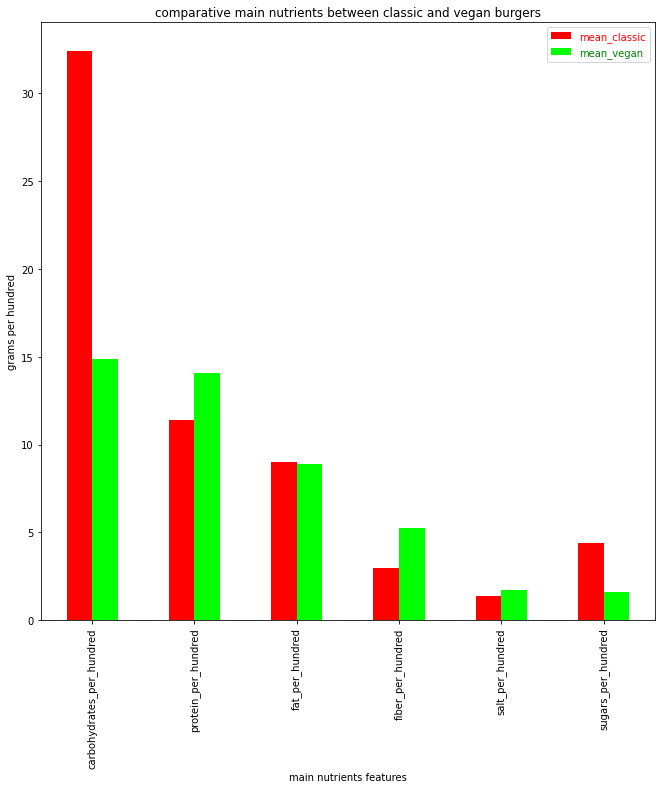

In [25]:
plt.figure(figsize=(15,9))

view_means_A = view_means.plot.bar(color=['red', 'lime'], figsize=(11,11))
plt.ylabel("grams per hundred")
plt.xlabel("main nutrients features")

plt.title("comparative main nutrients between classic and vegan burgers")
plt.legend(labelcolor= ["red", "green"])

Another style of displaying it

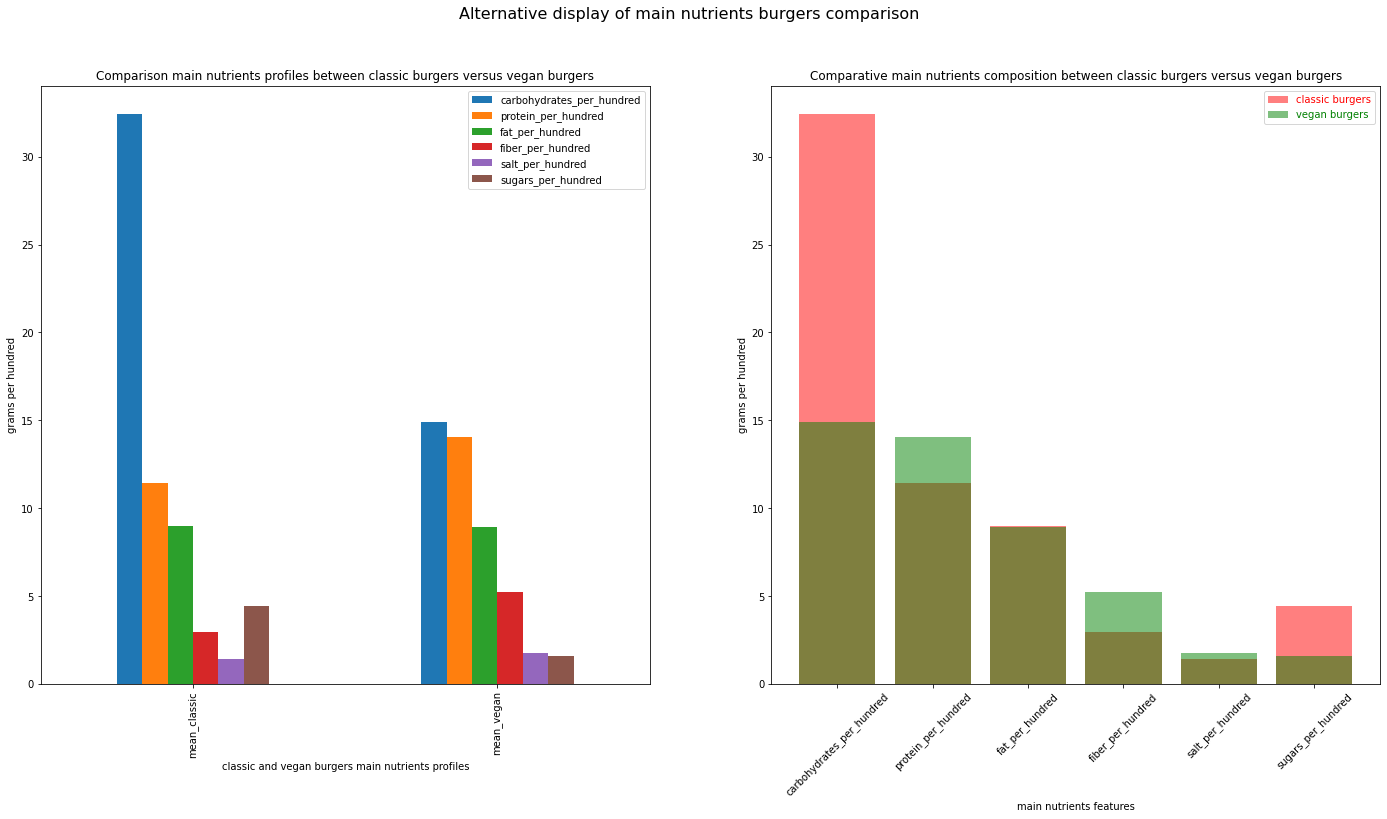

In [26]:
fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(24,11))

fig.suptitle("Alternative display of main nutrients burgers comparison", fontsize=16)

#+++++++++++ left plot

row10_11 = concat_df_macro_fibsalt_sug.iloc[[10,11]]
row10_11.plot(kind='bar', ax=ax0)


ax0.set_title("Comparison main nutrients profiles between classic burgers versus vegan burgers")

ax0.set_ylabel('grams per hundred')
ax0.set_xlabel('classic and vegan burgers main nutrients profiles')

#+++++++++++ right plot

row10 = concat_df_macro_fibsalt_sug.iloc[10]
row11 = concat_df_macro_fibsalt_sug.iloc[11]


row10draw = plt.bar(concat_df_macro_fibsalt_sug.columns,row10, alpha=0.5, color = 'r')
row11draw = plt.bar(concat_df_macro_fibsalt_sug.columns,row11, alpha=0.5, color = 'g')

plt.title("Comparative main nutrients composition between classic burgers versus vegan burgers")

plt.ylabel('grams per hundred')
plt.xlabel('main nutrients features')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.legend([row10draw, row11draw], ['classic burgers','vegan burgers'], loc='upper right', labelcolor= ["red", "green"])

Interpretation :
=====================================================================================================================================================================================
Classic burgers contains much more carbohydrates and sugars. This is interessant for people having metabolism disorder such as diabetis for example , who wants to buy burgers,
=====================================================================================================================================================================================
or just for prevention. This is not a medical study, just an overview for possible nutritional trials with prevention, dealing with real daily life and potential customers wishes.
=====================================================================================================================================================================================

Now, lets study what about fatty acid composition difference between classic versus vegan burgers
--------------------------------------------------------------------------------------------------

Here following few step for processing and printing respective fatty acid composition in a pretty table:

In [27]:
fatty_acids_nosum = ["fatty_acids_total_saturated_per_hundred","fatty_acids_total_trans_per_hundred","monounsaturated_fatty_acids_per_hundred","polyunsaturated_fatty_acids_per_hundred"]

fatty_acids_withsum = ["fatty_acids_total_saturated_per_hundred","fatty_acids_total_trans_per_hundred","monounsaturated_fatty_acids_per_hundred","polyunsaturated_fatty_acids_per_hundred","sum_all_fatty_acids"]

fatty_acids_diff = (df_burger_classic[fatty_acids_withsum].describe().compare(df_burger_vegan[fatty_acids_withsum].describe()))

fatty_acids_diff

fatty_acids_total_saturated_per_hundred             \
                                         self      other   
count                               62.000000  31.000000   
mean                                 1.330968   1.280645   
std                                  2.887817   0.693983   
min                                  0.000000   0.200000   
25%                                  0.000000   0.900000   
50%                                  0.000000   1.100000   
75%                                  1.350000   1.700000   
max                                 14.160000   2.600000   

      fatty_acids_total_trans_per_hundred             \
                                     self      other   
count                           58.000000  31.000000   
mean                             0.068793   0.054839   
std                              0.286375   0.067521   
min                                   NaN        NaN   
25%                                   NaN        NaN   
50%                                   NaN        NaN   
75%                              0.000000   0.100000   
max                              1.770000   0.200000   

      monounsaturated_fatty_acids_per_hundred             \
                                         self      other   
count                               13.000000  31.000000   
mean                                 2.720000   2.387097   
std                                  2.797141   1.641492   
min                                  0.000000   0.400000   
25%                                  0.400000   1.400000   
50%                                  1.040000   1.900000   
75%                                  6.200000   2.600000   
max                                  6.600000   6.300000   

      polyunsaturated_fatty_acids_per_hundred            sum_all_fatty_acids  \
                                         self      other                self   
count                               12.000000  31.000000          151.000000   
mean                                 2.941667   3.261290            1.040861   
std                                  4.887799   2.177717            3.939424   
min                                  0.000000   0.500000                 NaN   
25%                                  0.425000   1.700000            0.000000   
50%                                  1.060000   3.100000            0.000000   
75%                                  2.100000   4.250000            0.000000   
max                                 14.700000   8.700000           29.400000   

                  
           other  
count  39.000000  
mean    5.551282  
std     4.322942  
min          NaN  
25%     2.800000  
50%     5.600000  
75%     7.750000  
max    15.000000

In [28]:
fragfaty = fatty_acids_diff.iloc[1:3, :]

fragfaty

fatty_acids_total_saturated_per_hundred            \
                                        self     other   
mean                                1.330968  1.280645   
std                                 2.887817  0.693983   

     fatty_acids_total_trans_per_hundred            \
                                    self     other   
mean                            0.068793  0.054839   
std                             0.286375  0.067521   

     monounsaturated_fatty_acids_per_hundred            \
                                        self     other   
mean                                2.720000  2.387097   
std                                 2.797141  1.641492   

     polyunsaturated_fatty_acids_per_hundred           sum_all_fatty_acids  \
                                        self     other                self   
mean                                2.941667  3.261290            1.040861   
std                                 4.887799  2.177717            3.939424   

                
         other  
mean  5.551282  
std   4.322942

In [29]:
fragfaty.rename(columns={'self': 'classic', 'other': 'vegan'}, inplace=True)

fragfaty

/home/superman/anaconda3/envs/adsml/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


fatty_acids_total_saturated_per_hundred            \
                                     classic     vegan   
mean                                1.330968  1.280645   
std                                 2.887817  0.693983   

     fatty_acids_total_trans_per_hundred            \
                                 classic     vegan   
mean                            0.068793  0.054839   
std                             0.286375  0.067521   

     monounsaturated_fatty_acids_per_hundred            \
                                     classic     vegan   
mean                                2.720000  2.387097   
std                                 2.797141  1.641492   

     polyunsaturated_fatty_acids_per_hundred           sum_all_fatty_acids  \
                                     classic     vegan             classic   
mean                                2.941667  3.261290            1.040861   
std                                 4.887799  2.177717            3.939424   

                
         vegan  
mean  5.551282  
std   4.322942

In [30]:
fragfaty_mean = fragfaty.drop(fragfaty.index[1])

fragfaty_mean

fatty_acids_total_saturated_per_hundred            \
                                     classic     vegan   
mean                                1.330968  1.280645   

     fatty_acids_total_trans_per_hundred            \
                                 classic     vegan   
mean                            0.068793  0.054839   

     monounsaturated_fatty_acids_per_hundred            \
                                     classic     vegan   
mean                                    2.72  2.387097   

     polyunsaturated_fatty_acids_per_hundred          sum_all_fatty_acids  \
                                     classic    vegan             classic   
mean                                2.941667  3.26129            1.040861   

                
         vegan  
mean  5.551282

Interpretation : composition about fatty acid are close between both burgers categories.
---------------------------------------------------------------------------------------

Now, lets display this in pretty pies to get it in the eyes:
--------------------------------------------------------------

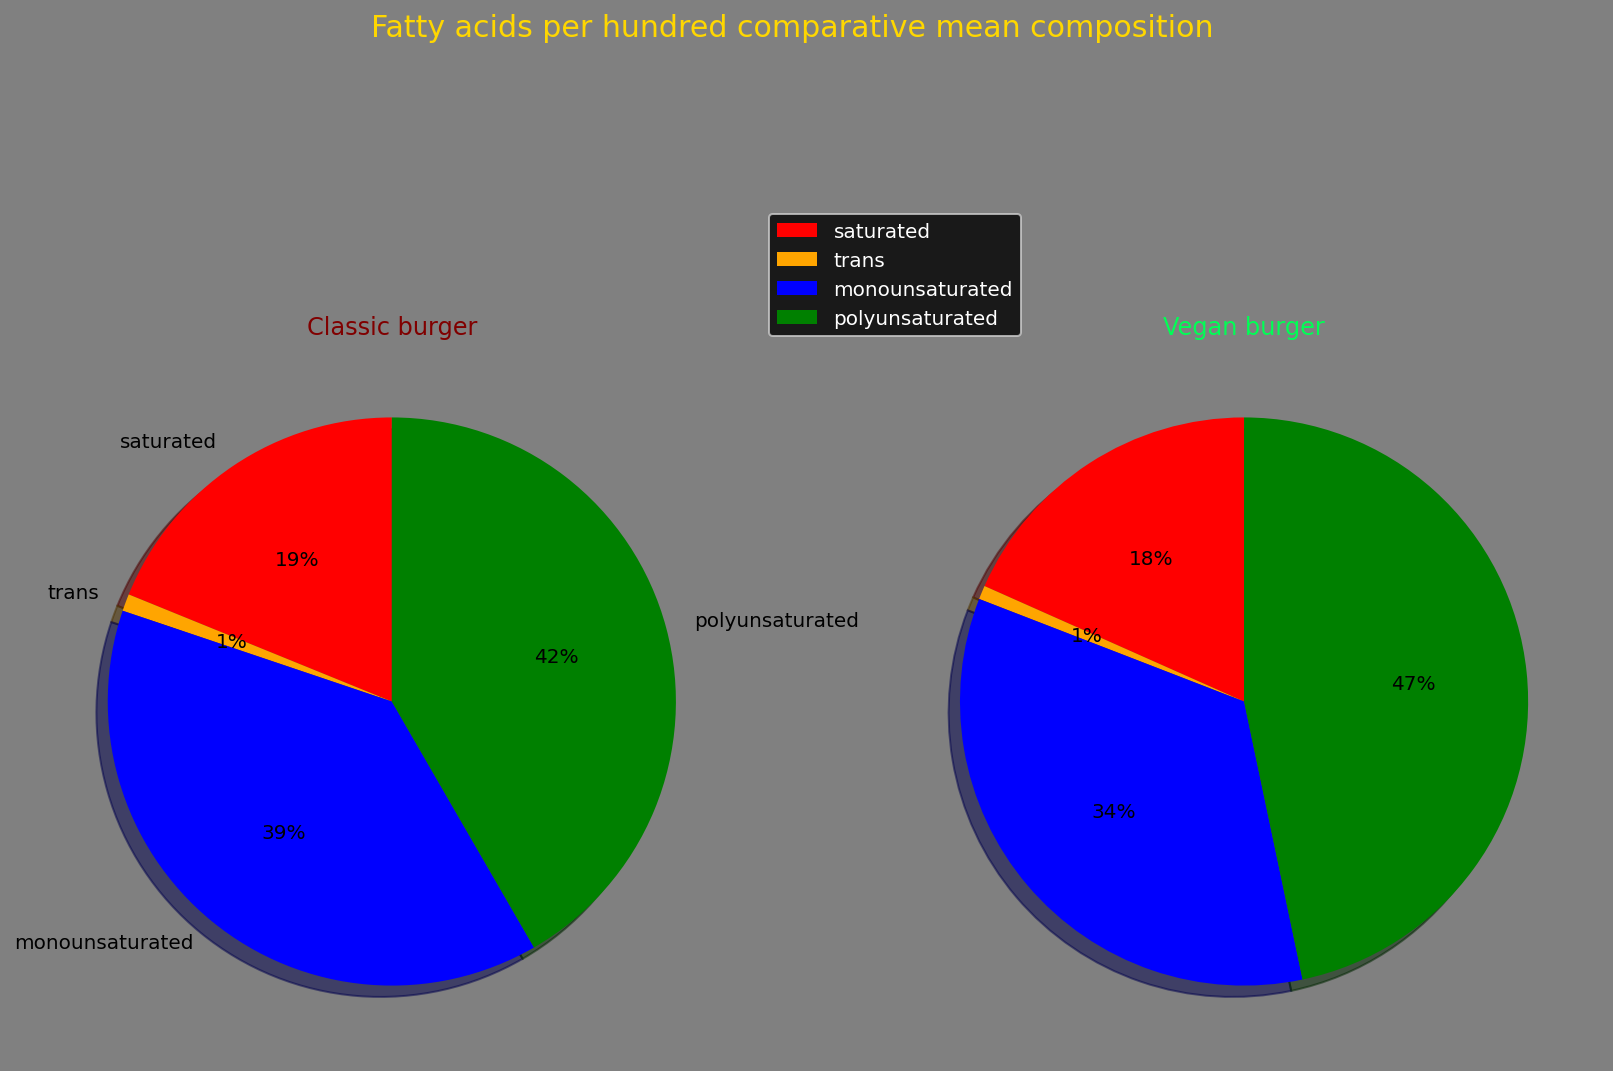

In [31]:
fig = plt.figure(figsize=(14,10),dpi=144, facecolor = "grey")

ax1 = fig.add_subplot(121)
ax1.set_title("Classic burger", color='maroon')

colors = ["red", "orange", "blue", "green"]
headings = ["saturated","trans","monounsaturated","polyunsaturated"]

val_left = [df_burger_classic["fatty_acids_total_saturated_per_hundred"].mean(),df_burger_classic["fatty_acids_total_trans_per_hundred"].mean(),df_burger_classic["monounsaturated_fatty_acids_per_hundred"].mean(),df_burger_classic["polyunsaturated_fatty_acids_per_hundred"].mean()]
plt.pie(val_left, labels=headings, autopct='%0.f%%', shadow=True, startangle=90, colors=colors)

plt.legend(facecolor='k', labelcolor='w', loc="upper right", bbox_to_anchor=(1.4,1.2))

ax2 = fig.add_subplot(122)
ax2.set_title("Vegan burger", color='#00ff55')

val_right = [df_burger_vegan["fatty_acids_total_saturated_per_hundred"].mean(),df_burger_vegan["fatty_acids_total_trans_per_hundred"].mean(),df_burger_vegan["monounsaturated_fatty_acids_per_hundred"].mean(),df_burger_vegan["polyunsaturated_fatty_acids_per_hundred"].mean()]
plt.pie(val_right, labels= None, autopct='%0.f%%', shadow=True, startangle=90, colors=colors)

fig.suptitle('Fatty acids per hundred comparative mean composition', fontsize=15, color='gold') # or plt.suptitle('Main title')
plt.show()

Now, lets have a look on cholesterol difference which also play a role in cardiovascular disease.
==================================================================================================
Nota bene : "Good" HDL cholesterol and "Bad" LDL cholesterol are not discrimined here, the cholesterol probably means "total cholesterol" (so, total = HDL + LDL).
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

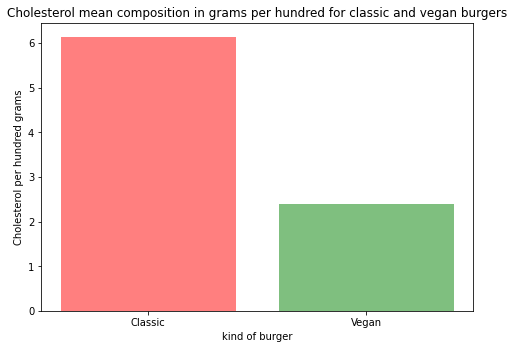

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
burger_kind = ['Classic', 'Vegan']

mean_chol_classic = concat_df.loc["mean_classic", "cholesterol_per_hundred"]

mean_chol_vegan = concat_df.loc["mean_vegan", "cholesterol_per_hundred"]

mean_chol_both = [mean_chol_classic, mean_chol_vegan]

my_colors = ['r', 'g']

ax.bar(burger_kind,mean_chol_both, color=my_colors, alpha= 0.5)

plt.xlabel("kind of burger")
plt.ylabel("Cholesterol per hundred grams")

plt.title("Cholesterol mean composition in grams per hundred for classic and vegan burgers")
plt.show()

Interpretation : as noticed , we dont know if the cholesterol is total or LDL kind... not exploitable.
-------------------------------------------------------------------------------------------------------

5- study Highly and Moderate toxic additives proportions difference between classic versus vegan burgers
==========================================================================================================

Here begin a long process , first we split the ingredients strings into "bags of words", we do the same kind of work for the toxic additives.
-----------------------------------------------------------------------------------------------------------------------------------------------
After we will count and store inside a dictionnary the occurence of toxics.
-----------------------------------------------------------------------------------------------------------------------------------------------
finally we display pies to see the predominent toxics in each category .
-----------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
pd.options.display.max_colwidth = 5000

In [34]:
df.fillna('', inplace=True)
print(df.iloc[44879]['ingredients_en'], "   ",type(df.iloc[44879]['ingredients_en']))

     <class 'str'>


In [35]:
print(df.iloc[41766]['ingredients_en'])

 rehydrated soy protein  rehydrated wheat protein potato starch onions natural flavors sunflower oil egg whites flavorings cooking salt wheat fiber onion powder spices  tomato powder garlic powder maltodextrin herbs iron ferrous gluconate vitamin B cyanocobalaminMay contain traces of milk


In [36]:
df_burger_vegan['ingredients_en'] = df_burger_vegan['ingredients_en'].str.upper()

df_burger_vegan.fillna('', inplace=True)

#df_burger_vegan['ingredients_en']  #uncomment to have a look if needed ...

/tmp/ipykernel_5204/3752876823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger_vegan['ingredients_en'] = df_burger_vegan['ingredients_en'].str.upper()
/home/superman/anaconda3/envs/adsml/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [37]:
import re

regex = re.compile('[^a-zA-Z]')

def remove_nonalpha(raw):
    
    regex = re.compile('[^a-zA-Z\s]')
    clean = regex.sub('', raw)

    return clean

df_burger_vegan['ingredients_en'] = df_burger_vegan['ingredients_en'].apply(lambda x: remove_nonalpha(x))

/tmp/ipykernel_5204/2848346527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger_vegan['ingredients_en'] = df_burger_vegan['ingredients_en'].apply(lambda x: remove_nonalpha(x))


In [38]:
df_burger_vegan['split_ingredients_en'] = df_burger_vegan['ingredients_en'].str.split(",")

/tmp/ipykernel_5204/4155440423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger_vegan['split_ingredients_en'] = df_burger_vegan['ingredients_en'].str.split(",")


In [39]:
df_burger_vegan['ingredients_en'].str.split()

37457                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [SEITAN, WHEAT, WHEAT, WHITE, WHEAT, TEXTURE, WHEAT, WHEAT, WHEAT, FLOUR, HIGH, OLEIC, SUNFLOWER, OIL, SPICES, SOY, SAUCE, WATER, SOYBEAN, SEA, SALT, YEAST, EXTRACT, ONION, RICE, FLOUR, VEDICATING, AGENT, LOCUST, BEAN, GUM]
41459                                                                                                                                                              

We use the structure SET to have only unique ingredients, and we check the lenght
-----------------------------------------------------------------------------------

In [40]:
list_of_words_vegan = ' '.join(df_burger_vegan['ingredients_en']).split()

set_of_words_vegan = set(list_of_words_vegan)

print(set_of_words_vegan)

print(len(set_of_words_vegan))

{'WHITES', 'CULTURE', 'SMOKE', 'RED', 'PART', 'ISOLATECONTAINS', 'NONMEAT', 'POTATO', 'WATER', 'SEED', 'WINE', 'PYRIDOXINE', 'WHOLE', 'RIPE', 'CARROT', 'SUNFLOWER', 'DISODIUM', 'LENTILS', 'SORBATE', 'MONONITRATE', 'COOKING', 'CURRENT', 'SKIM', 'PHOSPHATE', 'BETACAROTENE', 'BEAN', 'COCONUT', 'KERNEL', 'LONG', 'EMULSIFIER', 'SOYBEANS', 'CORNSTARCH', 'SODIUM', 'PERCENT', 'CARROTS', 'ISOLATE', 'HYDROCHLORIDE', 'CONTAINS', 'JUICE', 'ACID', 'CORN', 'JALAPENO', 'VITAMIN', 'CONTAIN', 'TRACES', 'PASTE', 'ANTIOXIDANT', 'REFINED', 'GRAIN', 'RAPESEED', 'THREE', 'PROVOLONE', 'FROM', 'AND', 'BASIL', 'FLAVORSPEA', 'CHIPOTLE', 'MUSHROOMS', 'SESAME', 'DRY', 'B', 'MALTODEXTRIN', 'FLAKES', 'SALT', 'YELLOW', 'DRINKING', 'PARTSKIM', 'WHEY', 'LEMON', 'LIME', 'CYANOCOBALAMINMAY', 'SULFATE', 'ONION', 'COLOUR', 'MALT', 'POTASSIUM', 'STABILISER', 'EGG', 'THIAMIN', 'OF', 'CHICKPEAS', 'CHEESE', 'NIACINAMIDE', 'JALAPEO', 'OAT', 'GARLIC', 'SOY', 'CAN', 'KONJAC', 'XANTHAN', 'SOYBEAN', 'ENZYMES', 'CHILES', 'INOSINATE

In [41]:
df_burger_classic['ingredients_en'] = df_burger_classic['ingredients_en'].str.upper()

df_burger_classic.fillna('', inplace=True)

df_burger_classic['ingredients_en']

df_burger_classic['ingredients_en'] = df_burger_classic['ingredients_en'].apply(lambda x: remove_nonalpha(x))

In [42]:
df_burger_classic['split_ingredients_en'] = df_burger_classic['ingredients_en'].str.split(",")

Same process for classic burgers ...
-------------------------------------

In [43]:
list_of_words_classic = ' '.join(df_burger_classic['ingredients_en']).split()

set_of_words_classic = set(list_of_words_classic)

print(set_of_words_classic)

print(len(set_of_words_classic))

{'SMOKE', 'RED', 'MONONITRATEFOLIC', 'STOCK', 'POTATO', 'ASCORBYL', 'SQUASH', 'AMERICAN', 'SWITZERLAND', 'PORK', 'CECI', 'CARROT', 'MAGNESIUM', 'CARROTSORGANIC', 'LECITHINALLERGENS', 'PRESERVE', 'DAIRY', 'PHOSPHATE', 'COM', 'BETACAROTENE', 'BEAN', 'CURCUMA', 'SUGARMAY', 'MISCELA', 'GRANULAR', 'STABILIZING', 'COLBY', 'PEANUTS', 'VISCOSE', 'JALAPENO', 'ISOLATE', 'DIACETATE', 'C', 'SPECIAL', 'LEAF', 'CORIANDER', 'MOISTURE', 'HAMBURGER', 'FROM', 'NOT', 'TUMERIC', 'PRESERVED', 'YELLOW', 'ANTIOXIDANTS', 'STABILIZERS', 'PARTSKIM', 'LEMON', 'SULFATE', 'ANTICAKING', 'VIRGIN', 'SALTORGANIC', 'CHICKPEAS', 'CHICORY', 'AROMI', 'SPELLED', 'DEGERMINATED', 'OAT', 'XANTHAN', 'RETENTION', 'MAY', 'SOYBEAN', 'ENZYMES', 'OLIO', 'NUTS', 'KALE', 'MALTO', 'FLAVORINGS', 'APO', 'LEAVES', 'PARMESAN', 'OR', 'ACQUA', 'TEXTURED', 'ONIONS', 'VEGETABLE', 'COLORING', 'AGENTDRIED', 'TOMATOES', 'SUCCINIC', 'DORZO', 'CULTURESENZYMES', 'PRODUCED', 'JAMAICA', 'HAVE', 'WEIZENGLUTEN', 'HARD', 'ACETATE', 'LIEVITO', 'GROUNDREA

In [44]:
#print("Union :  \n ", set_of_words_classic | set_of_words_vegan)   # uncomment to have a look if needed ...

In [45]:
#print("Intersection :  \n ", set_of_words_classic & set_of_words_vegan)   # uncomment to have a look if needed ...

Ingredients specific only found inside vegan burgers ingredients:
------------------------------------------------------------------

In [46]:
print("Difference :  \n ", set_of_words_vegan - set_of_words_classic)
print(f"\n   lenght :  {len(set_of_words_vegan - set_of_words_classic)}   ")

Difference :  
  {'PRESERVATIVES', 'LOCUST', 'CILANTRO', 'TARTARIC', 'ISOLATECONTAINS', 'NONMEAT', 'DRINKING', 'BUTTON', 'MUSHROOM', 'TRITICALE', 'MILLET', 'OLEIC', 'RIPE', 'FLOURCONTAINS', 'CYANOCOBALAMINMAY', 'PORTABELLA', 'PUMPKIN', 'COLOUR', 'ROMA', 'STABILISER', 'CURRENT', 'VEDICATING', 'TORULA', 'PECTIN', 'CRIMINI', 'KONJAC', 'KERNEL', 'CAN', 'MINERALS', 'FLAVOURINGS', 'ACACIA', 'CHILES', 'HYDRATION', 'REFINED', 'TAPIOCA', 'THREE', 'PROVOLONE', 'SOURCES', 'GLUCONATE', 'JALAPEO', 'FLAVORSPEA', 'WILD', 'CHIPOTLE', 'CHESTNUTS', 'TRIGLYCERIDES', 'CARRAGEENAN', 'BAMBOO', 'OLIVES', 'SEITAN', 'VITAMINS'}

   lenght :  50   


Ingredients specific only found inside classic burgers ingredients:
------------------------------------------------------------------

In [47]:
print("Difference :  \n ", set_of_words_classic - set_of_words_vegan)
print(f"\n   lenght :  {len(set_of_words_classic - set_of_words_vegan)}   ")

Difference :  
  {'MONONITRATEFOLIC', 'STOCK', 'ASCORBYL', 'SQUASH', 'AMERICAN', 'SWITZERLAND', 'PORK', 'CECI', 'CARROTSORGANIC', 'MAGNESIUM', 'LECITHINALLERGENS', 'PRESERVE', 'DAIRY', 'COM', 'CURCUMA', 'SUGARMAY', 'MISCELA', 'GRANULAR', 'STABILIZING', 'COLBY', 'PEANUTS', 'VISCOSE', 'DIACETATE', 'C', 'SPECIAL', 'LEAF', 'CORIANDER', 'MOISTURE', 'HAMBURGER', 'NOT', 'TUMERIC', 'PRESERVED', 'ANTIOXIDANTS', 'STABILIZERS', 'ANTICAKING', 'VIRGIN', 'SALTORGANIC', 'CHICORY', 'AROMI', 'SPELLED', 'DEGERMINATED', 'RETENTION', 'MAY', 'OLIO', 'NUTS', 'KALE', 'MALTO', 'APO', 'LEAVES', 'PARMESAN', 'ACQUA', 'AGENTDRIED', 'DORZO', 'CULTURESENZYMES', 'PRODUCED', 'JAMAICA', 'HAVE', 'WEIZENGLUTEN', 'HARD', 'ACETATE', 'LIEVITO', 'GROUNDREARED', 'ALUMINUM', 'ZUCCHERO', 'SPELT', 'MANNITOL', 'LACTOSE', 'NIGARI', 'PALMITATE', 'PHOSPHATES', 'PAPRIKAORGANIC', 'CARBONATE', 'YOGURT', 'ENZYMESDRIED', 'DOUGH', 'BICARBONATE', 'RICEORGANIC', 'MINT', 'GLUTAMATE', 'RAW', 'AOP', 'MIXTURE', 'BACON', 'FARMED', 'CITRATE', 'A

Interpretation : we see that classic burgers contains much more specific ingredients, but we dont process ratio because samples size differs a lot.
----------------------------------------------------------------------------------------------------------------------------------------------------

Now that we have prepaired the "bag of words" for classic and vegan burgers ingredients, we have also to prepare the dataframe from risky_additives.csv file.
==============================================================================================================================================================

In [48]:
df_tox = pd.read_csv('risky_additives.csv')

df_tox

,Additive,Risk
0,E330 - Citric acid,NaN
1,E322 - Lecithins,NaN
2,E322i - Lecithin,NaN
3,E500 - Sodium carbonates,NaN
4,E415 - Xanthan gum,NaN
...,...,...
568,E910 - Wax ester,NaN
569,E429 - Peptone,NaN
570,E333i - Monocalcium citrate,NaN
571,E946 - Octafluorocyclobutane,NaN


In [49]:
df_tox.shape

(573, 2)

In [50]:
df_tox.columns

Index(['Additive', 'Risk'], dtype='object')

In [51]:
df_tox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Additive  573 non-null    object
 1   Risk      66 non-null     object
dtypes: object(2)
memory usage: 9.1+ KB


In [52]:
df_tox.describe()

,Additive,Risk
count,573,66
unique,573,3
top,E330 - Citric acid,High risk of over exposure
freq,1,39


In [53]:
df_tox["Risk"].unique()

array([nan, 'High risk of over exposure',
       'No or very low risk of over exposure',
       'Moderate risk of over exposure'], dtype=object)

In [54]:
type(df_tox.iloc[0,1])

float

In [55]:
tox_with_risks = df_tox[df_tox['Risk'].notnull()]

In [56]:
df_tox

,Additive,Risk
0,E330 - Citric acid,NaN
1,E322 - Lecithins,NaN
2,E322i - Lecithin,NaN
3,E500 - Sodium carbonates,NaN
4,E415 - Xanthan gum,NaN
...,...,...
568,E910 - Wax ester,NaN
569,E429 - Peptone,NaN
570,E333i - Monocalcium citrate,NaN
571,E946 - Octafluorocyclobutane,NaN


WE CHECK IF NAN PRESENT inside df_tox

In [57]:
df_tox['Additive'].isnull().values.any()

False

After having a quick look on df_tox dataframe, the processing begins :
----------------------------------------------------------------------

In [58]:
df_tox["Additive"] = df_tox["Additive"].str.upper()

df_tox

,Additive,Risk
0,E330 - CITRIC ACID,NaN
1,E322 - LECITHINS,NaN
2,E322I - LECITHIN,NaN
3,E500 - SODIUM CARBONATES,NaN
4,E415 - XANTHAN GUM,NaN
...,...,...
568,E910 - WAX ESTER,NaN
569,E429 - PEPTONE,NaN
570,E333I - MONOCALCIUM CITRATE,NaN
571,E946 - OCTAFLUOROCYCLOBUTANE,NaN


In [59]:
import re

def remove_nonalpha(raw):
    
    regex = re.compile('[^a-zA-Z0-9\s]')
    clean = regex.sub('', raw)

    return clean

df_tox["Additive"] = df_tox["Additive"].apply(lambda x: remove_nonalpha(x))

In [60]:
df_tox.head(15)

,Additive,Risk
0,E330 CITRIC ACID,NaN
1,E322 LECITHINS,NaN
2,E322I LECITHIN,NaN
3,E500 SODIUM CARBONATES,NaN
4,E415 XANTHAN GUM,NaN
5,E471 MONO AND DIGLYCERIDES OF FATTY ACIDS,NaN
6,E500II SODIUM HYDROGEN CARBONATE,NaN
7,E412 GUAR GUM,NaN
8,E202 POTASSIUM SORBATE,High risk of over exposure
9,E450 DIPHOSPHATES,High risk of over exposure


In [61]:
df_tox.tail(15)

,Additive,Risk
558,E351 POTASSIUM MALATE,NaN
559,E1430 DISTARCH GLYCERINE,NaN
560,E161C CRYPTOAXANTHIN,NaN
561,E538 CALCIUM FERROCYANIDE,NaN
562,E625 MAGNESIUM DIGLUTAMATE,NaN
563,E126 PONCEAU 6R,NaN
564,E323 E323 FOOD ADDITIVE,NaN
565,E1205 BASIC METHACRYLATE COPOLYMER,NaN
566,E15X E15X FOOD ADDITIVE,NaN
567,E335I MONOSODIUM TARTRATE,NaN


The sentence "food additive" is useless, we replace it by empty piece of string
--------------------------------------------------------------------------------

In [62]:
df_tox["Additive"] = df_tox["Additive"].apply(lambda x: x.replace(' FOOD ADDITIVE', ''))

df_tox.tail(15)

,Additive,Risk
558,E351 POTASSIUM MALATE,NaN
559,E1430 DISTARCH GLYCERINE,NaN
560,E161C CRYPTOAXANTHIN,NaN
561,E538 CALCIUM FERROCYANIDE,NaN
562,E625 MAGNESIUM DIGLUTAMATE,NaN
563,E126 PONCEAU 6R,NaN
564,E323 E323,NaN
565,E1205 BASIC METHACRYLATE COPOLYMER,NaN
566,E15X E15X,NaN
567,E335I MONOSODIUM TARTRATE,NaN


In [63]:
def remove_firstspace(raw):
    ''' clean empty dead space in begining string '''
    
    clean = raw.split(" ", 1)
    
    return clean

df_tox["Additive"] = df_tox["Additive"].apply(lambda x: remove_firstspace(x))

df_tox

,Additive,Risk
0,"[E330, CITRIC ACID]",NaN
1,"[E322, LECITHINS]",NaN
2,"[E322I, LECITHIN]",NaN
3,"[E500, SODIUM CARBONATES]",NaN
4,"[E415, XANTHAN GUM]",NaN
...,...,...
568,"[E910, WAX ESTER]",NaN
569,"[E429, PEPTONE]",NaN
570,"[E333I, MONOCALCIUM CITRATE]",NaN
571,"[E946, OCTAFLUOROCYCLOBUTANE]",NaN


We discriminate different levels of risks, finally we will only work with medium and high risks food additives
---------------------------------------------------------------------------------------------------------------

In [64]:
no_or_low_risk_df = df_tox.loc[df_tox['Risk'] == 'No or very low risk of over exposure']  # view over no or low risk level inside dataframe df_tox

medium_risk_df = df_tox.loc[df_tox['Risk'] == 'Moderate risk of over exposure'] # view over medium risk level inside dataframe df_tox

high_risk_df = df_tox.loc[df_tox['Risk'] == 'High risk of over exposure']  # view over high risk level inside dataframe df_tox

high_risk_df

,Additive,Risk
8,"[E202, POTASSIUM SORBATE]",High risk of over exposure
9,"[E450, DIPHOSPHATES]",High risk of over exposure
10,"[E407, CARRAGEENAN]",High risk of over exposure
12,"[E250, SODIUM NITRITE]",High risk of over exposure
22,"[E341, CALCIUM PHOSPHATES]",High risk of over exposure
23,"[E211, SODIUM BENZOATE]",High risk of over exposure
30,"[E621, MONOSODIUM GLUTAMATE]",High risk of over exposure
46,"[E200, SORBIC ACID]",High risk of over exposure
47,"[E452, POLYPHOSPHATES]",High risk of over exposure
49,"[E481, SODIUM STEAROYL2LACTYLATE]",High risk of over exposure


We make list for working with international code or with full chemical name.
-----------------------------------------------------------------------------

In [65]:
chimik_Exxx_low_list = list()
chimik_Exxx_medium_list = list()
chimik_Exxx_high_list = list()

chimik_alpha_low_list = list()
chimik_alpha_medium_list = list()
chimik_alpha_high_list = list()

In [66]:
def append_chimiks(chimik_Exxx_list,chimik_alpha_list,x):    
    
    chimik_Exxx_list.append(x[0])
    
    try:
        chimik_alpha_list.append(x[1])
    except:
        print(f"\n      --------------->  Problem with x = {x}")
    
no_or_low_risk_df['Additive'].apply(lambda x: append_chimiks(chimik_Exxx_low_list, chimik_alpha_low_list, x))

medium_risk_df['Additive'].apply(lambda x: append_chimiks(chimik_Exxx_medium_list, chimik_alpha_medium_list, x))

high_risk_df['Additive'].apply(lambda x: append_chimiks(chimik_Exxx_high_list, chimik_alpha_high_list, x))

8      None
9      None
10     None
12     None
22     None
23     None
30     None
46     None
47     None
49     None
58     None
67     None
68     None
74     None
79     None
80     None
93     None
98     None
99     None
107    None
114    None
142    None
172    None
173    None
183    None
187    None
196    None
203    None
241    None
278    None
311    None
360    None
407    None
408    None
450    None
481    None
510    None
545    None
549    None
Name: Additive, dtype: object

In [67]:
chimik_Exxx_low_list

['E129',
 'E316',
 'E951',
 'E150A',
 'E132',
 'E1520',
 'E150D',
 'E170I',
 'E315',
 'E150B',
 'E122',
 'E151',
 'E123']

In [68]:
chimik_alpha_low_list = [chimik.strip() for chimik in chimik_alpha_low_list]

chimik_alpha_low_list

['ALLURA RED AC',
 'SODIUM ERYTHORBATE',
 'ASPARTAME',
 'PLAIN CARAMEL',
 'INDIGOTINE',
 'PROPYLENE GLYCOL',
 'SULPHITE AMMONIA CARAMEL',
 'CALCIUM CARBONATE',
 'ERYTHORBIC ACID',
 'CAUSTIC SULPHITE CARAMEL',
 'AZORUBINE',
 'BRILLIANT BLACK BN',
 'AMARANTH']

In [69]:
chimik_Exxx_medium_list

['E150C',
 'E133',
 'E435',
 'E433',
 'E960',
 'E509',
 'E131',
 'E508',
 'E142',
 'E432',
 'E511',
 'E436',
 'E507',
 'E434']

In [70]:
chimik_alpha_medium_list = [chimik.strip() for chimik in chimik_alpha_medium_list]


chimik_alpha_medium_list

['AMMONIA CARAMEL',
 'BRILLIANT BLUE FCF',
 'POLYOXYETHYLENE SORBITAN MONOSTEARATE',
 'POLYOXYETHYLENE SORBITAN MONOOLEATE',
 'STEVIOL GLYCOSIDES',
 'CALCIUM CHLORIDE',
 'PATENT BLUE V',
 'POTASSIUM CHLORIDE',
 'GREEN S',
 'POLYOXYETHYLENE SORBITAN MONOLAURATE',
 'MAGNESIUM CHLORIDE',
 'POLYOXYETHYLENE SORBITAN TRISTEARATE',
 'HYDROCHLORIC ACID',
 'POLYOXYETHYLENE SORBITAN MONOPALMITATE']

In [71]:
chimik_Exxx_high_list

['E202',
 'E450',
 'E407',
 'E250',
 'E341',
 'E211',
 'E621',
 'E200',
 'E452',
 'E481',
 'E340',
 'E451',
 'E223',
 'E338',
 'E220',
 'E252',
 'E339',
 'E212',
 'E224',
 'E491',
 'E222',
 'E251',
 'E407A',
 'E492',
 'E221',
 'E473',
 'E210',
 'E343',
 'E482',
 'E228',
 'E155',
 'E243',
 'E226',
 'E494',
 'E459',
 'E493',
 'E213',
 'E227',
 'E495']

In [72]:
chimik_alpha_high_list = [chimik.strip() for chimik in chimik_alpha_high_list]


chimik_alpha_high_list

['POTASSIUM SORBATE',
 'DIPHOSPHATES',
 'CARRAGEENAN',
 'SODIUM NITRITE',
 'CALCIUM PHOSPHATES',
 'SODIUM BENZOATE',
 'MONOSODIUM GLUTAMATE',
 'SORBIC ACID',
 'POLYPHOSPHATES',
 'SODIUM STEAROYL2LACTYLATE',
 'POTASSIUM PHOSPHATES',
 'TRIPHOSPHATES',
 'SODIUM METABISULPHITE',
 'PHOSPHORIC ACID',
 'SULPHUR DIOXIDE',
 'POTASSIUM NITRATE',
 'SODIUM PHOSPHATES',
 'POTASSIUM BENZOATE',
 'POTASSIUM METABISULPHITE',
 'SORBITAN MONOSTEARATE',
 'SODIUM BISULPHITE',
 'SODIUM NITRATE',
 'PROCESSED EUCHEUMA SEAWEED',
 'SORBITAN TRISTEARATE',
 'SODIUM SULPHITE',
 'SUCROSE ESTERS OF FATTY ACIDS',
 'BENZOIC ACID',
 'MAGNESIUM PHOSPHATES',
 'CALCIUM STEAROYL2LACTYLATE',
 'POTASSIUM BISULPHITE',
 'BROWN HT',
 'ETHYL LAUROYL ARGINATE',
 'CALCIUM SULPHITE',
 'SORBITAN MONOOLEATE',
 'BETACYCLODEXTRINE',
 'SORBITAN MONOLAURATE',
 'CALCIUM BENZOATE',
 'CALCIUM BISULPHITE',
 'SORBITAN MONOPALMITATE']

Now that our lists are ready to use, we count each of their occurence 
------------------------------------------------------------------------

In [73]:
def find_pattern(pattern, dico_counter, idx, row):        
    for pat in pattern:        
        if pat in row:
            dico_counter[pat] += 1            
            #print(f" \n\n       ****    {row}  present slash \n {pat}    -->  +1  --TOTAL COUNT FOR THIS ADDITIVE-->     {dico_counter[pat]}      \n")
            print(f"Relative subset Index: {idx}    contains {pat}     ===> TOTAL COUNT FOR THIS ADDITIVE : {dico_counter[pat]}      \n")
            #print(".................................................................................................................................................... \n")

            
tox_dico_count_classic_high = {key: 0 for key in chimik_alpha_high_list}
tox_dico_count_classic_medium = {key: 0 for key in chimik_alpha_medium_list}

tox_dico_count_vegan_high = {key: 0 for key in chimik_alpha_high_list}
tox_dico_count_vegan_medium = {key: 0 for key in chimik_alpha_medium_list}

Looking for additive inside classic burgers
===========================================

In [74]:
md(f"  <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>: LOOKING FOR ADDITIVE WITH <font color='red'>   HIGH RISK   </font> </strong></center></h2> ")


  <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>: LOOKING FOR ADDITIVE WITH <font color='red'>   HIGH RISK   </font> </strong></center></h2> 

In [75]:
filtered=df_burger_classic['ingredients_en']
for idx,row in enumerate(filtered):
    find_pattern(chimik_alpha_high_list, tox_dico_count_classic_high, idx, row)

Relative subset Index: 12    contains SODIUM NITRITE     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 14    contains SODIUM NITRITE     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 15    contains SODIUM NITRITE     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 18    contains SORBIC ACID     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 19    contains SORBIC ACID     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 21    contains MONOSODIUM GLUTAMATE     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 30    contains MONOSODIUM GLUTAMATE     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 34    contains MONOSODIUM GLUTAMATE     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 77    contains SODIUM NITRITE     ===> TOTAL COUNT FOR THIS ADDITIVE : 4      

Relative subset Index: 77    contains MONOSODIUM GLUTAMATE   

In [76]:
md(f" <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>:   LOOKING FOR ADDITIVE WITH <font color='orange'>    MEDIUM RISK </font>  </strong></center></h2> ")


 <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>:   LOOKING FOR ADDITIVE WITH <font color='orange'>    MEDIUM RISK </font>  </strong></center></h2> 

In [77]:
for idx,row in enumerate(filtered):
    find_pattern(chimik_alpha_medium_list, tox_dico_count_classic_medium, idx, row)

Relative subset Index: 107    contains POTASSIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 114    contains MAGNESIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 116    contains MAGNESIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 120    contains POTASSIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 122    contains POTASSIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 123    contains MAGNESIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 131    contains MAGNESIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 4      

Relative subset Index: 137    contains POTASSIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 4      

Relative subset Index: 140    contains MAGNESIUM CHLORIDE     ===> TOTAL COUNT FOR THIS ADDITIVE : 5      

Relative subset Index: 142  

Looking for additive inside vegan burgers
===========================================

In [78]:
md(f" <h2><center><strong> <font color='green'> VEGAN BURGERS </font> : LOOKING FOR ADDITIVE WITH    <font color='red'> HIGH RISK  </font>  </strong></center></h2> ")


 <h2><center><strong> <font color='green'> VEGAN BURGERS </font> : LOOKING FOR ADDITIVE WITH    <font color='red'> HIGH RISK  </font>  </strong></center></h2> 

In [79]:
filtered=df_burger_vegan['ingredients_en']
for idx,row in enumerate(filtered):
    find_pattern(chimik_alpha_high_list, tox_dico_count_vegan_high, idx, row)

Relative subset Index: 3    contains POTASSIUM SORBATE     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 16    contains CARRAGEENAN     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 33    contains CARRAGEENAN     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      



In [80]:
md(f" <h2><center><strong>  <font color='green'> VEGAN BURGERS </font> : LOOKING FOR ADDITIVE WITH    <font color='orange'> MEDIUM RISK </font>  </strong></center></h2> ")


 <h2><center><strong>  <font color='green'> VEGAN BURGERS </font> : LOOKING FOR ADDITIVE WITH    <font color='orange'> MEDIUM RISK </font>  </strong></center></h2> 

In [81]:
for idx,row in enumerate(filtered):
    find_pattern(chimik_alpha_medium_list, tox_dico_count_vegan_medium, idx, row)

In [82]:
md(f" <h2><center><strong>  <font color='yellow'> RESUME OF TOXIC FOUND IN THEIR RESPECTIVE SUBSET </font>:  </strong></center></h2> ")


 <h2><center><strong>  <font color='yellow'> RESUME OF TOXIC FOUND IN THEIR RESPECTIVE SUBSET </font>:  </strong></center></h2> 

In [83]:
md(f" <h3><center> \n count of how many times   high toxic have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='red'> {tox_dico_count_classic_high} </font>  </strong></center></h3>")

 <h3><center> 
 count of how many times   high toxic have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='red'> {'POTASSIUM SORBATE': 1, 'DIPHOSPHATES': 0, 'CARRAGEENAN': 0, 'SODIUM NITRITE': 6, 'CALCIUM PHOSPHATES': 0, 'SODIUM BENZOATE': 2, 'MONOSODIUM GLUTAMATE': 13, 'SORBIC ACID': 6, 'POLYPHOSPHATES': 0, 'SODIUM STEAROYL2LACTYLATE': 0, 'POTASSIUM PHOSPHATES': 0, 'TRIPHOSPHATES': 0, 'SODIUM METABISULPHITE': 0, 'PHOSPHORIC ACID': 0, 'SULPHUR DIOXIDE': 0, 'POTASSIUM NITRATE': 0, 'SODIUM PHOSPHATES': 3, 'POTASSIUM BENZOATE': 0, 'POTASSIUM METABISULPHITE': 0, 'SORBITAN MONOSTEARATE': 1, 'SODIUM BISULPHITE': 0, 'SODIUM NITRATE': 0, 'PROCESSED EUCHEUMA SEAWEED': 0, 'SORBITAN TRISTEARATE': 0, 'SODIUM SULPHITE': 0, 'SUCROSE ESTERS OF FATTY ACIDS': 0, 'BENZOIC ACID': 0, 'MAGNESIUM PHOSPHATES': 0, 'CALCIUM STEAROYL2LACTYLATE': 0, 'POTASSIUM BISULPHITE': 0, 'BROWN HT': 0, 'ETHYL LAUROYL ARGINATE': 0, 'CALCIUM SULPHITE': 0, 'SORBITAN MONOOLEATE': 0, 'BETACYCLODEXTRINE': 0, 'SORBITAN MONOLAURATE': 0, 'CALCIUM BENZOATE': 0, 'CALCIUM BISULPHITE': 0, 'SORBITAN MONOPALMITATE': 0} </font>  </strong></center></h3>

In [84]:
md(f" <h3><center> \n count of how many times   medium toxic have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='orange'> {tox_dico_count_classic_medium} </font>  </strong></center></h3>")


 <h3><center> 
 count of how many times   medium toxic have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='orange'> {'AMMONIA CARAMEL': 0, 'BRILLIANT BLUE FCF': 0, 'POLYOXYETHYLENE SORBITAN MONOSTEARATE': 0, 'POLYOXYETHYLENE SORBITAN MONOOLEATE': 0, 'STEVIOL GLYCOSIDES': 0, 'CALCIUM CHLORIDE': 1, 'PATENT BLUE V': 0, 'POTASSIUM CHLORIDE': 4, 'GREEN S': 0, 'POLYOXYETHYLENE SORBITAN MONOLAURATE': 0, 'MAGNESIUM CHLORIDE': 7, 'POLYOXYETHYLENE SORBITAN TRISTEARATE': 0, 'HYDROCHLORIC ACID': 0, 'POLYOXYETHYLENE SORBITAN MONOPALMITATE': 0} </font>  </strong></center></h3>

In [85]:
md(f" <h3><center> \n count of how many times   high toxic have been found  among <font color='green'> vegan burgers </font> <br> <strong>   <font color='red'> {tox_dico_count_vegan_high} </font>  </strong></center></h3>")


 <h3><center> 
 count of how many times   high toxic have been found  among <font color='green'> vegan burgers </font> <br> <strong>   <font color='red'> {'POTASSIUM SORBATE': 1, 'DIPHOSPHATES': 0, 'CARRAGEENAN': 2, 'SODIUM NITRITE': 0, 'CALCIUM PHOSPHATES': 0, 'SODIUM BENZOATE': 0, 'MONOSODIUM GLUTAMATE': 0, 'SORBIC ACID': 0, 'POLYPHOSPHATES': 0, 'SODIUM STEAROYL2LACTYLATE': 0, 'POTASSIUM PHOSPHATES': 0, 'TRIPHOSPHATES': 0, 'SODIUM METABISULPHITE': 0, 'PHOSPHORIC ACID': 0, 'SULPHUR DIOXIDE': 0, 'POTASSIUM NITRATE': 0, 'SODIUM PHOSPHATES': 0, 'POTASSIUM BENZOATE': 0, 'POTASSIUM METABISULPHITE': 0, 'SORBITAN MONOSTEARATE': 0, 'SODIUM BISULPHITE': 0, 'SODIUM NITRATE': 0, 'PROCESSED EUCHEUMA SEAWEED': 0, 'SORBITAN TRISTEARATE': 0, 'SODIUM SULPHITE': 0, 'SUCROSE ESTERS OF FATTY ACIDS': 0, 'BENZOIC ACID': 0, 'MAGNESIUM PHOSPHATES': 0, 'CALCIUM STEAROYL2LACTYLATE': 0, 'POTASSIUM BISULPHITE': 0, 'BROWN HT': 0, 'ETHYL LAUROYL ARGINATE': 0, 'CALCIUM SULPHITE': 0, 'SORBITAN MONOOLEATE': 0, 'BETACYCLODEXTRINE': 0, 'SORBITAN MONOLAURATE': 0, 'CALCIUM BENZOATE': 0, 'CALCIUM BISULPHITE': 0, 'SORBITAN MONOPALMITATE': 0} </font>  </strong></center></h3>

In [86]:
md(f" <h3><center> \n count of how many times   medium toxic have been found  among <font color='green'> vegan burgers </font>  <br> <strong>  <font color='orange'> {tox_dico_count_vegan_medium} </font>  </strong></center></h3>")


 <h3><center> 
 count of how many times   medium toxic have been found  among <font color='green'> vegan burgers </font>  <br> <strong>  <font color='orange'> {'AMMONIA CARAMEL': 0, 'BRILLIANT BLUE FCF': 0, 'POLYOXYETHYLENE SORBITAN MONOSTEARATE': 0, 'POLYOXYETHYLENE SORBITAN MONOOLEATE': 0, 'STEVIOL GLYCOSIDES': 0, 'CALCIUM CHLORIDE': 0, 'PATENT BLUE V': 0, 'POTASSIUM CHLORIDE': 0, 'GREEN S': 0, 'POLYOXYETHYLENE SORBITAN MONOLAURATE': 0, 'MAGNESIUM CHLORIDE': 0, 'POLYOXYETHYLENE SORBITAN TRISTEARATE': 0, 'HYDROCHLORIC ACID': 0, 'POLYOXYETHYLENE SORBITAN MONOPALMITATE': 0} </font>  </strong></center></h3>

Samples Classic versus Vegan burgers dont have the same size so we have to process ratios ; the following steps are preparing the pie we want to display
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [87]:
classic_high_toxs = list(tox_dico_count_classic_high.items())
classic_high_toxs

[('POTASSIUM SORBATE', 1),
 ('DIPHOSPHATES', 0),
 ('CARRAGEENAN', 0),
 ('SODIUM NITRITE', 6),
 ('CALCIUM PHOSPHATES', 0),
 ('SODIUM BENZOATE', 2),
 ('MONOSODIUM GLUTAMATE', 13),
 ('SORBIC ACID', 6),
 ('POLYPHOSPHATES', 0),
 ('SODIUM STEAROYL2LACTYLATE', 0),
 ('POTASSIUM PHOSPHATES', 0),
 ('TRIPHOSPHATES', 0),
 ('SODIUM METABISULPHITE', 0),
 ('PHOSPHORIC ACID', 0),
 ('SULPHUR DIOXIDE', 0),
 ('POTASSIUM NITRATE', 0),
 ('SODIUM PHOSPHATES', 3),
 ('POTASSIUM BENZOATE', 0),
 ('POTASSIUM METABISULPHITE', 0),
 ('SORBITAN MONOSTEARATE', 1),
 ('SODIUM BISULPHITE', 0),
 ('SODIUM NITRATE', 0),
 ('PROCESSED EUCHEUMA SEAWEED', 0),
 ('SORBITAN TRISTEARATE', 0),
 ('SODIUM SULPHITE', 0),
 ('SUCROSE ESTERS OF FATTY ACIDS', 0),
 ('BENZOIC ACID', 0),
 ('MAGNESIUM PHOSPHATES', 0),
 ('CALCIUM STEAROYL2LACTYLATE', 0),
 ('POTASSIUM BISULPHITE', 0),
 ('BROWN HT', 0),
 ('ETHYL LAUROYL ARGINATE', 0),
 ('CALCIUM SULPHITE', 0),
 ('SORBITAN MONOOLEATE', 0),
 ('BETACYCLODEXTRINE', 0),
 ('SORBITAN MONOLAURATE', 0),


In [88]:
classic_high_toxs = [i for i in classic_high_toxs if i[1] != 0]
classic_high_toxs

[('POTASSIUM SORBATE', 1),
 ('SODIUM NITRITE', 6),
 ('SODIUM BENZOATE', 2),
 ('MONOSODIUM GLUTAMATE', 13),
 ('SORBIC ACID', 6),
 ('SODIUM PHOSPHATES', 3),
 ('SORBITAN MONOSTEARATE', 1)]

In [89]:
classic_high_toxs.sort(key=lambda a: a[1], reverse=True)
classic_high_toxs

[('MONOSODIUM GLUTAMATE', 13),
 ('SODIUM NITRITE', 6),
 ('SORBIC ACID', 6),
 ('SODIUM PHOSPHATES', 3),
 ('SODIUM BENZOATE', 2),
 ('POTASSIUM SORBATE', 1),
 ('SORBITAN MONOSTEARATE', 1)]

In [90]:
vegan_high_toxs = list(tox_dico_count_vegan_high.items())


vegan_high_toxs = [i for i in vegan_high_toxs if i[1] != 0]

vegan_high_toxs.sort(key=lambda a: a[1], reverse=True)
vegan_high_toxs

[('CARRAGEENAN', 2), ('POTASSIUM SORBATE', 1)]

In [91]:
classic_medium_toxs = list(tox_dico_count_classic_medium.items())


classic_medium_toxs = [i for i in classic_medium_toxs if i[1] != 0]

classic_medium_toxs.sort(key=lambda a: a[1], reverse=True)
classic_medium_toxs

[('MAGNESIUM CHLORIDE', 7), ('POTASSIUM CHLORIDE', 4), ('CALCIUM CHLORIDE', 1)]

In [92]:
vegan_medium_toxs = list(tox_dico_count_vegan_medium.items())


vegan_medium_toxs = [i for i in vegan_medium_toxs if i[1] != 0]

vegan_medium_toxs.sort(key=lambda a: a[1], reverse=True)
vegan_medium_toxs

[]

In [93]:
heading_classic_high_name, heading_classic_high_count = map(list, zip(*classic_high_toxs))

In [94]:
heading_classic_high_name

['MONOSODIUM GLUTAMATE',
 'SODIUM NITRITE',
 'SORBIC ACID',
 'SODIUM PHOSPHATES',
 'SODIUM BENZOATE',
 'POTASSIUM SORBATE',
 'SORBITAN MONOSTEARATE']

In [95]:
heading_classic_high_count

[13, 6, 6, 3, 2, 1, 1]

In [96]:
heading_classic_medium_name, heading_classic_medium_count = map(list, zip(*classic_medium_toxs))

print(heading_classic_medium_name)
heading_classic_medium_count

['MAGNESIUM CHLORIDE', 'POTASSIUM CHLORIDE', 'CALCIUM CHLORIDE']


[7, 4, 1]

In [97]:
classic_tox_high_and_medium_name = heading_classic_high_name + heading_classic_medium_name
print(classic_tox_high_and_medium_name)

['MONOSODIUM GLUTAMATE', 'SODIUM NITRITE', 'SORBIC ACID', 'SODIUM PHOSPHATES', 'SODIUM BENZOATE', 'POTASSIUM SORBATE', 'SORBITAN MONOSTEARATE', 'MAGNESIUM CHLORIDE', 'POTASSIUM CHLORIDE', 'CALCIUM CHLORIDE']


In [98]:
print(len(heading_classic_high_name))
print(len(heading_classic_medium_name))
print(len(classic_tox_high_and_medium_name))

7
3
10


In [99]:
val_left = heading_classic_high_count + heading_classic_medium_count


In [100]:
heading_vegan_high_name, heading_vegan_high_count = map(list, zip(*vegan_high_toxs))

vegan_tox_high_and_medium_name = heading_vegan_high_name #+ heading_vegan_medium_name

val_right = heading_vegan_high_count #+ heading_vegan_medium_count


In [101]:
colors_classic = ["red"]*len(heading_classic_high_name) + ["orange"]*len(heading_classic_medium_name)

colors_vegan = ["red"]*len(heading_vegan_high_name) #+ ["orange"]*len(heading_vegan_medium_name) NONE

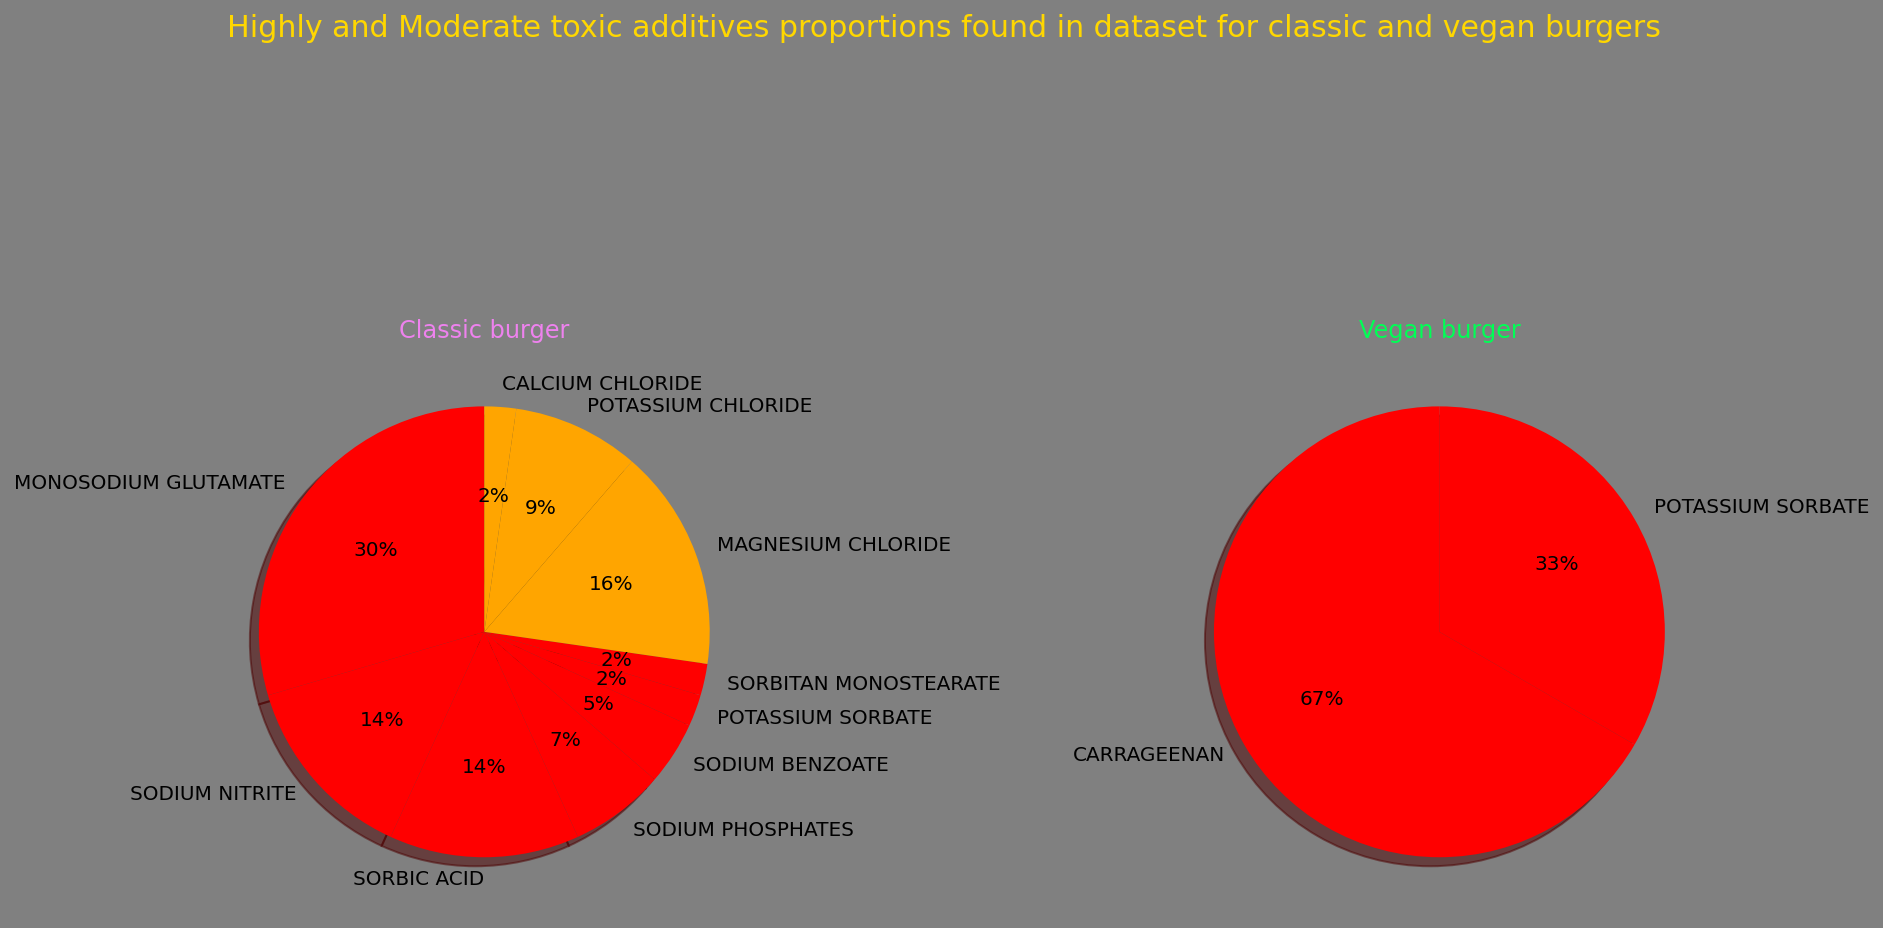

In [102]:
fig = plt.figure(figsize=(14,8),dpi=144, facecolor = "grey")

ax1 = fig.add_subplot(121)
ax1.set_title("Classic burger", color='violet')

headings_classic = classic_tox_high_and_medium_name

plt.pie(val_left, labels=headings_classic, autopct='%0.f%%', shadow=True, startangle=90, colors=colors_classic)


ax2 = fig.add_subplot(122)
ax2.set_title("Vegan burger", color='#00ff55')

headings_vegan = vegan_tox_high_and_medium_name

plt.pie(val_right, labels= headings_vegan, autopct='%0.f%%', shadow=True, startangle=90, colors=colors_vegan)


fig.suptitle('Highly and Moderate toxic additives proportions found in dataset for classic and vegan burgers', fontsize=15, color='gold') # or plt.suptitle('Main title')

fig.tight_layout(pad=5.0)

plt.show()

Interpretation : 
=================
Vegan industry should develop a susbstitue for Carrageenan especially to drop the adverage toxicity of their products.
------------------------------------------------------------------------------------------------------------------------
There is a more diversified profeil about classic burger's food additive, this was expected due the bigger size of the sample. Monosodium glutamate is the most frequent
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
additive for classic burgers.
-----------------------------


GLUTEN

    Wheat
    Rye
    Spelt
    Barley
    Unripe spelt grain
    Oats 
    Small spelt
    Amelcorn
    Kamut
    Triticale

ALLERGENS

    celery
cereals containing gluten (such as barley and oats)
crustaceans (such as prawns, crabs, and lobsters)
eggs
fish
lupin
milk
mollusks (such as mussels and oysters)
mustard
peanuts
sesame
soybeans
tree nuts (almonds, hazelnuts, walnuts, brazil nuts, cashews, pecans, pistachios, and macadamia nuts).


In [103]:
df_burger_classic["split_ingredients_en"] = df_burger_classic["ingredients_en"].str.split()
df_burger_vegan["split_ingredients_en"] = df_burger_vegan["ingredients_en"].str.split()

/tmp/ipykernel_5204/3492384712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger_vegan["split_ingredients_en"] = df_burger_vegan["ingredients_en"].str.split()


In [104]:
df_burger_classic['ingredients_count'] = df_burger_classic.split_ingredients_en.apply(len)

df_burger_vegan['ingredients_count'] = df_burger_vegan.split_ingredients_en.apply(len)

/tmp/ipykernel_5204/910446135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burger_vegan['ingredients_count'] = df_burger_vegan.split_ingredients_en.apply(len)


In [105]:
df_burger_classic.iloc[0,:]

calcium_per_hundred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
carbohydrates_per_hundred                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [106]:
df_burger_classic["ingredients_count"].describe()

count    151.000000
mean      47.549669
std       42.997161
min        0.000000
25%       16.500000
50%       39.000000
75%       75.000000
max      257.000000
Name: ingredients_count, dtype: float64

In [107]:
df_burger_vegan["ingredients_count"].describe()

count     39.000000
mean      72.282051
std       29.634571
min        0.000000
25%       57.500000
50%       77.000000
75%       96.000000
max      117.000000
Name: ingredients_count, dtype: float64

In [108]:
df_burger_classic["ingredients_count"].head(10)

68      61
3182     0
3183     0
3185     0
3957     0
6528     0
6566    16
6568    19
6570    27
6571    17
Name: ingredients_count, dtype: int64

In [109]:
df_burger_vegan["ingredients_count"].head(10)

37457    31
41459    37
41766    39
41767    50
43448    20
43449    18
43851    15
44879     0
45187    82
45274    74
Name: ingredients_count, dtype: int64

In [110]:
df_burger_classic["ingredients_count"].head()

68      61
3182     0
3183     0
3185     0
3957     0
Name: ingredients_count, dtype: int64

In [111]:
allergo_line1 = "celery cereals crustaceans (such as prawns, crabs, and lobsters)  eggs"

allergo_line2 = " fish  lupin   milk   mollusks (such as mussels and oysters) mustard  peanuts sesame soybeans tree nuts"

allergo_line3 = " (almonds, hazelnuts, walnuts, brazil nuts, cashews, pecans, pistachios, and macadamia nuts)."

allergo_big_string = allergo_line1 + allergo_line2 + allergo_line3

allergo_lines_alpha = "".join(c for c in allergo_big_string if c.isalpha() or c.isspace())

query = allergo_lines_alpha.upper()




stopwords = ['SUCH', 'AND', 'AS']
querywords = query.split()
resultwords  = [word for word in querywords if word.upper() not in stopwords]
allergo_lines_clean = ' '.join(resultwords)
print(allergo_lines_clean)

CELERY CEREALS CRUSTACEANS PRAWNS CRABS LOBSTERS EGGS FISH LUPIN MILK MOLLUSKS MUSSELS OYSTERS MUSTARD PEANUTS SESAME SOYBEANS TREE NUTS ALMONDS HAZELNUTS WALNUTS BRAZIL NUTS CASHEWS PECANS PISTACHIOS MACADAMIA NUTS


In [112]:
allergens_list = allergo_lines_clean.split()
print(allergens_list)

['CELERY', 'CEREALS', 'CRUSTACEANS', 'PRAWNS', 'CRABS', 'LOBSTERS', 'EGGS', 'FISH', 'LUPIN', 'MILK', 'MOLLUSKS', 'MUSSELS', 'OYSTERS', 'MUSTARD', 'PEANUTS', 'SESAME', 'SOYBEANS', 'TREE', 'NUTS', 'ALMONDS', 'HAZELNUTS', 'WALNUTS', 'BRAZIL', 'NUTS', 'CASHEWS', 'PECANS', 'PISTACHIOS', 'MACADAMIA', 'NUTS']


In [113]:
def find_pattern(pattern, dico_counter, idx, row):        
    for pat in pattern:        
        if pat in row:
            dico_counter[pat] += 1            
            #print(f" \n\n       ****    {row}  present slash \n {pat}    -->  +1  --TOTAL COUNT FOR THIS ADDITIVE-->     {dico_counter[pat]}      \n")
            print(f"Relative subset Index: {idx}    contains {pat}     ===> TOTAL COUNT FOR THIS ADDITIVE : {dico_counter[pat]}      \n")
            #print(".................................................................................................................................................... \n")

            
tox_dico_count_classic_high = {key: 0 for key in chimik_alpha_high_list}
tox_dico_count_classic_medium = {key: 0 for key in chimik_alpha_medium_list}

tox_dico_count_vegan_high = {key: 0 for key in chimik_alpha_high_list}
tox_dico_count_vegan_medium = {key: 0 for key in chimik_alpha_medium_list}

Looking for allergens inside classic burgers
===========================================

In [114]:
allergen_dico_count_classic = {key: 0 for key in allergens_list}


In [115]:
md(f"  <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>: looking for Allergens </strong> <br> </center></h2> ")


  <h2><center><strong>  <font color='purple'> CLASSIC BURGERS </font>: looking for Allergens </strong> <br> </center></h2> 

In [116]:
filtered=df_burger_classic['ingredients_en']
for idx,row in enumerate(filtered):
    find_pattern(allergens_list, allergen_dico_count_classic, idx, row)

Relative subset Index: 0    contains CELERY     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 0    contains PEANUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 0    contains NUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 0    contains NUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 0    contains NUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 8    contains EGGS     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 14    contains MUSTARD     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 15    contains MILK     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 15    contains MUSTARD     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 16    contains BRAZIL     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 21    contains CELERY     ===> TOTAL COU

In [117]:
md(f" <h3><center> \n count of how many times   Allergens have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='maroon'> {allergen_dico_count_classic} </font>  </strong></center></h3>")

 <h3><center> 
 count of how many times   Allergens have been found  among <font color='purple'> classic burgers </font> <br> <strong>  <font color='maroon'> {'CELERY': 6, 'CEREALS': 0, 'CRUSTACEANS': 0, 'PRAWNS': 0, 'CRABS': 0, 'LOBSTERS': 0, 'EGGS': 4, 'FISH': 1, 'LUPIN': 0, 'MILK': 52, 'MOLLUSKS': 0, 'MUSSELS': 0, 'OYSTERS': 0, 'MUSTARD': 12, 'PEANUTS': 1, 'SESAME': 3, 'SOYBEANS': 6, 'TREE': 0, 'NUTS': 3, 'ALMONDS': 0, 'HAZELNUTS': 0, 'WALNUTS': 0, 'BRAZIL': 1, 'CASHEWS': 0, 'PECANS': 0, 'PISTACHIOS': 0, 'MACADAMIA': 0} </font>  </strong></center></h3>

Looking for allergens inside vegan burgers
===========================================

In [118]:
allergen_dico_count_vegan = {key: 0 for key in allergens_list}


In [119]:
md(f"  <h2><center><strong>  <font color='green'> VEGAN BURGERS </font>: looking for Allergens </strong> <br> </center></h2> ")


  <h2><center><strong>  <font color='green'> VEGAN BURGERS </font>: looking for Allergens </strong> <br> </center></h2> 

In [120]:
filtered=df_burger_vegan['ingredients_en']

for idx,row in enumerate(filtered):
    find_pattern(allergens_list, allergen_dico_count_vegan, idx, row)

Relative subset Index: 1    contains CELERY     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 1    contains MUSTARD     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 1    contains SESAME     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 2    contains MILK     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 8    contains MILK     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 10    contains MILK     ===> TOTAL COUNT FOR THIS ADDITIVE : 3      

Relative subset Index: 11    contains MILK     ===> TOTAL COUNT FOR THIS ADDITIVE : 4      

Relative subset Index: 13    contains MUSTARD     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 13    contains NUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 1      

Relative subset Index: 13    contains NUTS     ===> TOTAL COUNT FOR THIS ADDITIVE : 2      

Relative subset Index: 13    contains NUTS     ===> TOTAL COUNT F

In [121]:
md(f" <h3><center> \n count of how many times   Allergens have been found  among <font color='green'> vegan burgers </font> <br> <strong>  <font color='maroon'> {allergen_dico_count_vegan} </font>  </strong></center></h3>")

 <h3><center> 
 count of how many times   Allergens have been found  among <font color='green'> vegan burgers </font> <br> <strong>  <font color='maroon'> {'CELERY': 9, 'CEREALS': 0, 'CRUSTACEANS': 0, 'PRAWNS': 0, 'CRABS': 0, 'LOBSTERS': 0, 'EGGS': 0, 'FISH': 0, 'LUPIN': 0, 'MILK': 14, 'MOLLUSKS': 0, 'MUSSELS': 0, 'OYSTERS': 0, 'MUSTARD': 2, 'PEANUTS': 0, 'SESAME': 5, 'SOYBEANS': 16, 'TREE': 0, 'NUTS': 15, 'ALMONDS': 0, 'HAZELNUTS': 0, 'WALNUTS': 0, 'BRAZIL': 0, 'CASHEWS': 0, 'PECANS': 0, 'PISTACHIOS': 0, 'MACADAMIA': 0} </font>  </strong></center></h3>

In [122]:
classic_allergen_found_list = list(allergen_dico_count_classic.items())

print(classic_allergen_found_list)

classic_allergen_found_list = [i for i in classic_allergen_found_list if i[1] != 0]

print(classic_allergen_found_list)



[('CELERY', 6), ('CEREALS', 0), ('CRUSTACEANS', 0), ('PRAWNS', 0), ('CRABS', 0), ('LOBSTERS', 0), ('EGGS', 4), ('FISH', 1), ('LUPIN', 0), ('MILK', 52), ('MOLLUSKS', 0), ('MUSSELS', 0), ('OYSTERS', 0), ('MUSTARD', 12), ('PEANUTS', 1), ('SESAME', 3), ('SOYBEANS', 6), ('TREE', 0), ('NUTS', 3), ('ALMONDS', 0), ('HAZELNUTS', 0), ('WALNUTS', 0), ('BRAZIL', 1), ('CASHEWS', 0), ('PECANS', 0), ('PISTACHIOS', 0), ('MACADAMIA', 0)]
[('CELERY', 6), ('EGGS', 4), ('FISH', 1), ('MILK', 52), ('MUSTARD', 12), ('PEANUTS', 1), ('SESAME', 3), ('SOYBEANS', 6), ('NUTS', 3), ('BRAZIL', 1)]


In [123]:

classic_allergen_found_list.sort(key=lambda a: a[1], reverse=True)
print(classic_allergen_found_list)

[('MILK', 52), ('MUSTARD', 12), ('CELERY', 6), ('SOYBEANS', 6), ('EGGS', 4), ('SESAME', 3), ('NUTS', 3), ('FISH', 1), ('PEANUTS', 1), ('BRAZIL', 1)]


In [124]:
THRESHOLD = 2
classic_allergen_found_list = [(k, v) for (k, v) in classic_allergen_found_list if v>= THRESHOLD]

In [125]:
vegan_allergen_found_list = list(allergen_dico_count_vegan.items())
vegan_allergen_found_list = [i for i in vegan_allergen_found_list if i[1] != 0]
vegan_allergen_found_list.sort(key=lambda a: a[1], reverse=True)
print(vegan_allergen_found_list)

[('SOYBEANS', 16), ('NUTS', 15), ('MILK', 14), ('CELERY', 9), ('SESAME', 5), ('MUSTARD', 2)]


In [126]:
heading_classic_allergen_name, heading_classic_allergen_count = map(list, zip(*classic_allergen_found_list))

In [127]:
print(heading_classic_allergen_name)
print(heading_classic_allergen_count)

['MILK', 'MUSTARD', 'CELERY', 'SOYBEANS', 'EGGS', 'SESAME', 'NUTS']
[52, 12, 6, 6, 4, 3, 3]


In [128]:
heading_vegan_allergen_name, heading_vegan_allergen_count = map(list, zip(*vegan_allergen_found_list))

In [129]:
print(heading_vegan_allergen_name)
print(heading_vegan_allergen_count)

['SOYBEANS', 'NUTS', 'MILK', 'CELERY', 'SESAME', 'MUSTARD']
[16, 15, 14, 9, 5, 2]


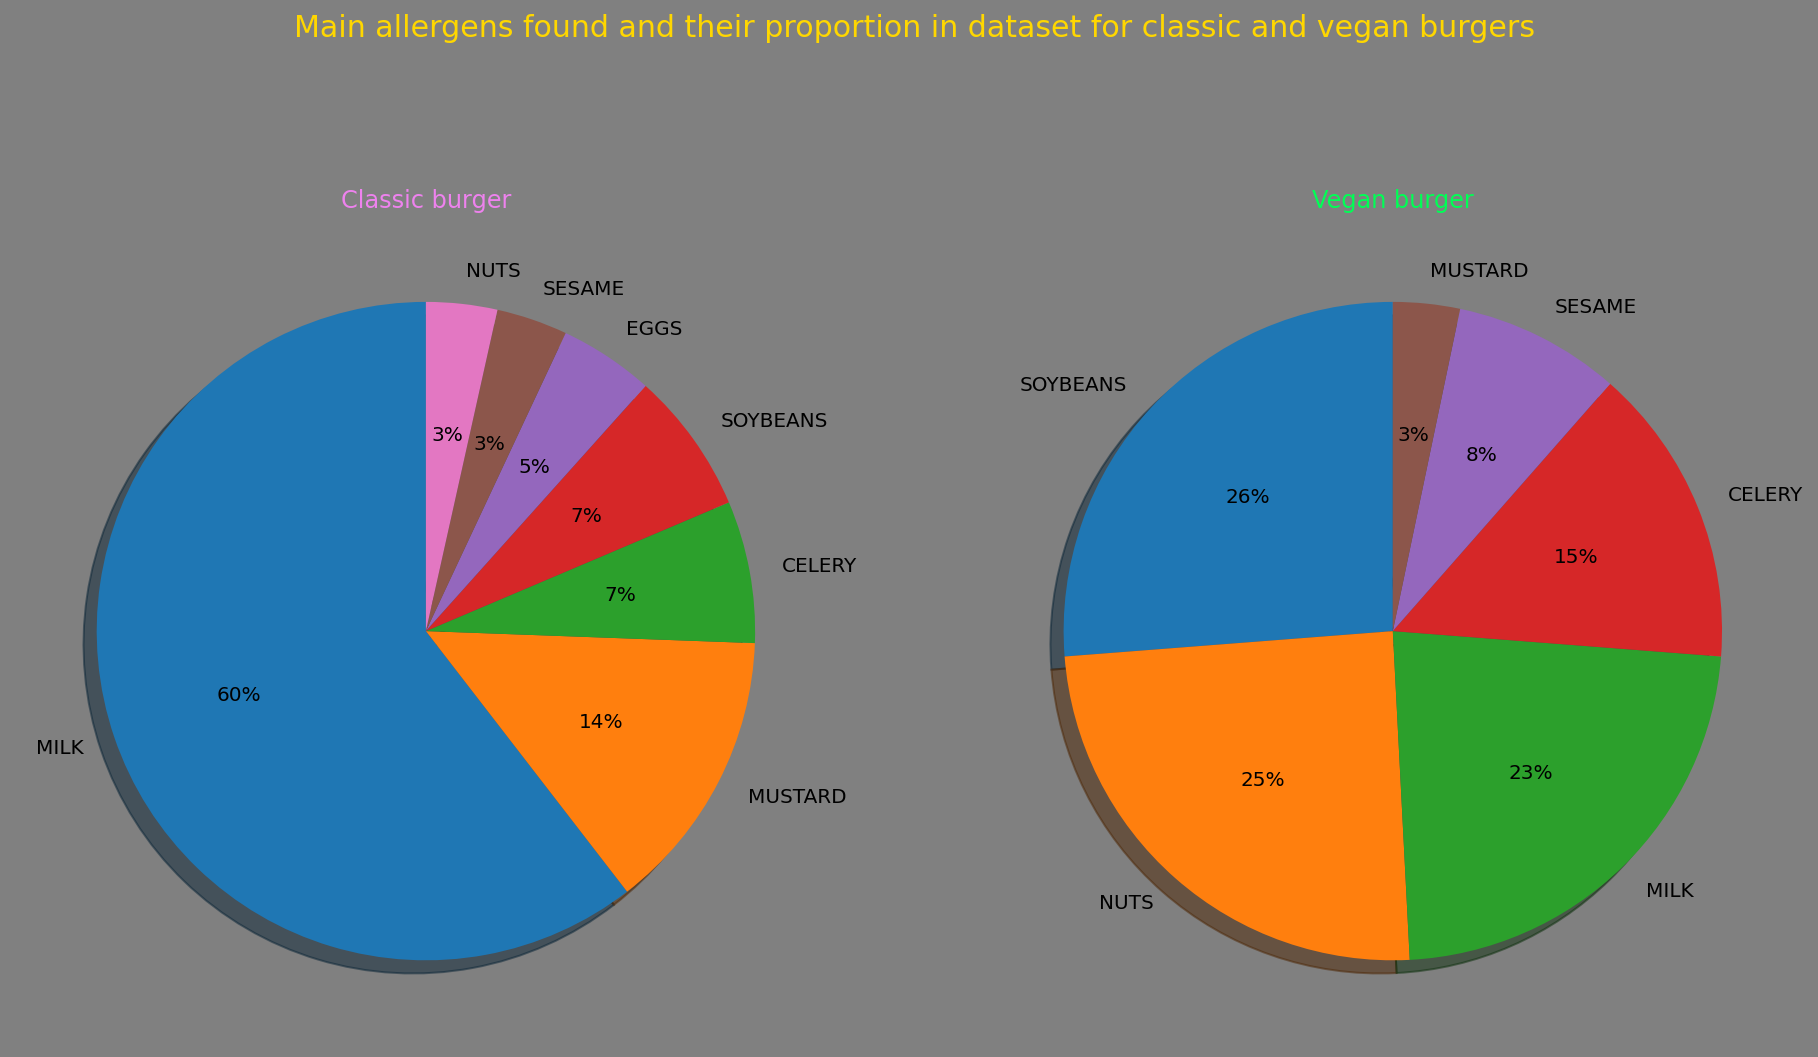

In [130]:
fig = plt.figure(figsize=(14,8),dpi=144, facecolor = "grey")

ax1 = fig.add_subplot(121)
ax1.set_title("Classic burger", color='violet')

headings_classic = heading_classic_allergen_name

plt.pie(heading_classic_allergen_count, labels=headings_classic, autopct='%0.f%%', shadow=True, startangle=90)

ax2 = fig.add_subplot(122)
ax2.set_title("Vegan burger", color='#00ff55')

headings_vegan = heading_vegan_allergen_name

plt.pie(heading_vegan_allergen_count, labels= headings_vegan, autopct='%0.f%%', shadow=True, startangle=90)

fig.suptitle('Main allergens found and their proportion in dataset for classic and vegan burgers', fontsize=15, color='gold') # or plt.suptitle('Main title')

fig.tight_layout(pad=5.0)

plt.show()

Interpretation : 
================

for classic burger's allergen, there is milk which is from far the predominent allergen : 60 %.
------------------------------------------------------------------------------------------------
for vegan burger, there is not a such hegemony , three quarters of them come from soybeans , nuts and milk with nearly equal parts.
------------------------------------------------------------------------------------------------------------------------------------

D. Text data
=============

The essential methods and skills for data analysis can vary from one data type to another. For instance, text data requires different manipulation techniques than numerical data. One example of text data in the Open Food database is available in the ingredients_en column. In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.

    Which product has the longest ingredients list?
    Which products have the shortest ingredients list?
    Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.


In [131]:
df = None # refresh memory to be sure

In [132]:
#df = pd.read_pickle('data_385k.pkl', compression='zip')
df = pd.read_pickle('POST_B8_data_385k.pkl', compression='zip')

In [133]:
df['ingredients_en'].fillna('', inplace=True)

In [134]:
df['ingredients_en'] = df['ingredients_en'].apply(lambda x: remove_nonalpha(x)) # remove ,

In [135]:
df['ingredients_en'] = df['ingredients_en'].str.upper()

In [136]:
#df['ingredients_en'].head(35) # uncomment to check

In [137]:
#df['ingredients_en'].tail(35) # uncomment to check

In [138]:
pattern_to_replace = "\s\d+"

df["ingredients_en"].replace(to_replace = pattern_to_replace, value ='', regex= True, inplace=True)

In [139]:
pattern_to_replace = "^\d+"

df["ingredients_en"].replace(to_replace = pattern_to_replace, value ='', regex= True, inplace=True)

In [140]:
pattern_to_replace = "\s\d+$"

df["ingredients_en"].replace(to_replace = pattern_to_replace, value ='', regex= True, inplace=True)

In [141]:
df["ingredients_en"].replace(r'\r+|\n+|\t+',' ', regex=True, inplace=True)

In [142]:
#df['ingredients_en'].head(35)  # uncomment to check

In [143]:
#df['ingredients_en'].tail(35)  # uncomment to check

In [144]:
import shlex

df["ingredients_en"] = df["ingredients_en"].apply(lambda x: shlex.split(x))

In [145]:
#df['ingredients_en'].head(5) # uncomment to check

In [146]:
#df['ingredients_en'].tail(5) # uncomment to check

In [147]:
def clean_string(string_to_clean):
    
    stopwords = [
    '\r','\n','TRADED', 'IN', 'COMPLIANCE', 'WITH', 'FAIRTRADE', 'STANDARDS','SUCH', 'AND', 'AS', 'THE', 'OF', 'EXTRACT', 'IN', 'AGENTS', 'CONTAINS',
    'CONVERTED', 'ORGANIC', 'NATURAL', 'FARM', 'FARMS', 'DI', 'WHOLE','TO','MINIMUM','MAXIMUM','FOOD', 'ADDITIVE','ADDITION','EXTRACTED', 'FROM', 'EXTRACT',
    'FRESHLY', 'SQUEEZED', 'POWDER', 'COMING','ACCORDANCE', 'MAY', 'CONTAIN', 'OCCASIONAL', 'UNPOPPED', 'KERNEL', 'MODIFIED', 'TRACES', 'CONTENT',
    'TOTAL', 'WEIGHT', 'WHICH', 'PRODUCTS', 'EDIBLE',' WITHOUT',        
    'MASS', 'BALANCE', 'ALL', 'AGRICULTURAL', 'INGREDIENTS', 'COME', 'THAT', 'ARE', 'BEING', 'TO', 'ORGANIC', 'FARMING']
            
    resultwords  = [word for word in string_to_clean if word not in stopwords]
    
    return resultwords

In [148]:
df['ingredients_en'] = df['ingredients_en'].apply(lambda x: clean_string(x))

In [149]:
#df['ingredients_en'].head(99)                #UNCOMMENT TO HAVE A LOOK ON THE EFFICIENCY OF clean_string FUNCTION

In [150]:
#df['ingredients_en'].tail(99)    #UNCOMMENT TO HAVE A LOOK ON THE EFFICIENCY OF clean_string FUNCTION

We make a set to remove the duplicate ingredients
-------------------------------------------------

In [151]:
df['set_ingredients_en'] = df['ingredients_en'].apply(lambda x: set(x))

We mesure the lenght of each row's ingredient in english language
-----------------------------------------------------------------

In [152]:
df['len_set_ingredients_en'] = df['set_ingredients_en'].apply(lambda x: len(x))

We find the longer length of them
---------------------------------

In [153]:
print(df['len_set_ingredients_en'].max()) 

160


In [154]:
longuest_ingrendients_en_index= df.index[df['len_set_ingredients_en'] == 160].tolist()

In [155]:
longuest_ingrendients_en_index = longuest_ingrendients_en_index[0]

In [156]:
longuest_ingrendients_en_index

364636

In [157]:
the_longuest_row = df.iloc[longuest_ingrendients_en_index]

In [158]:
#the_longuest_row[['barcode', 'product_name_de', 'product_name_en', 'product_name_fr', 'ingredients_en']]     #  barcode 0726191150637

#the_longuest_row[['product_name_de', 'product_name_en', 'product_name_fr', 'ingredients_en']]

The product having the longuest unique ingredients list has row index 364636 , is called SPICY CHIPOTLE CHICKEN WRAP, SPICY CHIPOTLE CHICKEN.
========================================================================================================================================================================

In [159]:
header_txt_start = f" <h3><center><strong> "

longest_txt = f"The product having the longuest unique ingredients list has row index <font color='grey'> {longuest_ingrendients_en_index} </font>"
is_called_txt = f" it is called <font color='red'> {the_longuest_row['product_name_en']} </font> "
has_lenght_txt = f" it has ingredients list lenght <font color='blue'> {df['len_set_ingredients_en'].max()} </font> "

contains_txt = f" and it contains <font color='yellow'> {the_longuest_row['ingredients_en']} </font>"

header_txt_end = f" </strong></center></h3> "

full_txt = header_txt_start + longest_txt + is_called_txt + has_lenght_txt +  contains_txt + header_txt_end

In [160]:
md(full_txt)

 <h3><center><strong> The product having the longuest unique ingredients list has row index <font color='grey'> 364636 </font> it is called <font color='red'> SPICY CHIPOTLE CHICKEN WRAP, SPICY CHIPOTLE CHICKEN </font>  it has ingredients list lenght <font color='blue'> 160 </font>  and it contains <font color='yellow'> ['JIL', 'CHICKEN', 'BREAST', 'RIB', 'MEN', 'BONELESS', 'SKINLESS', 'CHICKEN', 'BREAST', 'RIB', 'MEAT', 'WATER', 'OR', 'LESS', 'VINEGAR', 'SEASONING', 'SALT', 'MALTODEXTRIN', 'SPICES', 'ONION', 'GARLIC', 'PAPRIKA', 'PARSLEY', 'EXTRACTIVES', 'PAPRIKA', 'FLAVORING', 'ISOLATED', 'SOY', 'PROTEIN', 'PRODUCT', 'ISOLATED', 'SOY', 'PROTEIN', 'FOODS', 'STARCH', 'CARRAGEENAN', 'LESS', 'THAN', 'LECITHIN', 'SODIUM', 'PHOSPHATES', 'CHICKEN', 'BROTH', 'SOUTHWEST', 'STYLE', 'WRAP', 'BREAD', 'ENRICHED', 'WHEAT', 'FLOUR', 'WHEAT', 'FLOUR', 'MALTED', 'BARLEY', 'FLOUR', 'NIACIN', 'REDUCED', 'IRON', 'THIAMINE', 'MONONITRATE', 'RIBOFLAVIN', 'FOUC', 'ACID', 'WATER', 'BREAD', 'BASE', 'WHEAT', 'GLUTEN', 'CORN', 'STARCH', 'OAT', 'FIBER', 'SOY', 'PROTEIN', 'ISOLATE', 'SOYBEAN', 'OIL', 'DEFATTED', 'SOY', 'FLOUR', 'SESAME', 'SEED', 'FLOUR', 'WHEAT', 'FLOUR', 'DEXTROSE', 'MONOGLYCERIDES', 'CHIPOTLE', 'SEASONING', 'GARLIC', 'ONION', 'SPICE', 'INCLUDING', 'CHIPOTLE', 'PEPPER', 'SUGAR', 'PAPRIKA', 'LEMON', 'LIME', 'JUICE', 'SOLIDS', 'CORN', 'SYRUP', 'SOUDS', 'FLAVOR', 'CITRIC', 'ACID', 'ORANGE', 'PEEL', 'CARROT', 'FLAVORS', 'PARSLEY', 'SOYBEAN', 'OIL', 'RED', 'BELL', 'PEPPER', 'CANOLA', 'OIL', 'RAW', 'SUGAR', 'SEA', 'SALT', 'ONION', 'YEAST', 'ENZYMES', 'COLBY', 'MONTEREY', 'JACK', 'CHEESE', 'LOVES', 'JALAPENO', 'HABANERO', 'PEPPERS', 'PASTEURIZED', 'MILK', 'JALAPENO', 'PEPPERS', 'CHEESE', 'CULTURE', 'SALT', 'HABANERO', 'PEPPERS', 'ENZYMES', 'ANNATTO', 'VEGETABLE', 'COLOR', 'GREEN', 'LENF', 'LETTUCE', 'CHIPOTLE', 'ROASTED', 'TOMTO', 'SALSA', 'RANCH', 'DRESSING', 'CANOLA', 'OIL', 'WATER', 'POWDERED', 'BUTTERMILK', 'SOUR', 'CREAM', 'CULTURED', 'CREAM', 'ROASTED', 'TOMATO', 'FIRE', 'ROASTED', 'TOMATO', 'TOMATO', 'JUICE', 'CITRIC', 'ACID', 'CALCIUM', 'CHLORIDE', 'APPLE', 'CIDER', 'VINEGAR', 'TOMATO', 'ONION', 'EGG', 'YOLK', 'IPASTEURIZED', 'EGG', 'YOUKS', 'SALTI', 'SUGAR', 'CILANTRO', 'SEA', 'SALT', 'JALAPENO', 'PEPPER', 'FLAVOR', 'CHIPOTLE', 'SAUCE', 'CHIPOTLE', 'PEPPERS', 'WATER', 'TOMATO', 'PASTE', 'VINEGAR', 'ONIONS', 'SUGAR', 'SALT', 'CANOLA', 'OIL', 'SPICES', 'GARLIC', 'WHITE', 'DISTILLED', 'VINEGAR', 'DIJON', 'MUSTARD', 'DISTILLED', 'VINEGAR', 'WATER', 'MUSTARD', 'SEED', 'SEA', 'SALT', 'WHITE', 'WINE', 'CITRIC', 'ACID', 'TURMERIC', 'SPICES', 'ONION', 'UME', 'JUICE', 'CONCENTRATE', 'CUMIN', 'DRIED', 'OREGANO', 'XANTHAN', 'GUM', 'LEMON', 'JUICE', 'CONCENTRATE', 'WHITE', 'PEPPER', 'CHIPONE', 'SMOKED', 'SEASONING', 'DEXTROSE', 'PAPRIKA', 'ICOLOR', 'CHIU', 'PEPPER', 'ONION', 'CHIPOTLE', 'PEPPER', 'SALT', 'YEAST', 'MUSTARD', 'SPICES', 'GARLIC', 'CITRIC', 'ACID', 'DEHYDRATED', 'PARSLEY', 'EXTRACTIVE', 'PAPRIKA', 'ICOLOR', 'DISODIUM', 'INOSINATE', 'DISODIUM', 'GUANYLATE', 'MALTODEXTRIN', 'SMOKE', 'FLAVOR', 'NOT', 'MORE', 'THAN', 'SILICON', 'DIOXIDE', 'CALCIUM', 'STEARATE', 'ADDED', 'ANTICAKING', 'JALAPENO', 'PEPPER'] </font> </strong></center></h3> 

In [161]:
md(f" <h2><center><strong> Lets have a look now on entries having zero ingredients in english language </strong></center></h2> ")

 <h2><center><strong> Lets have a look now on entries having zero ingredients in english language </strong></center></h2> 

In [162]:
zero_ingredient_en_list_index= df.index[df['len_set_ingredients_en'] == 0].tolist()

In [163]:
len_zero_ingredient_en_list_index = len(zero_ingredient_en_list_index)

In [164]:
zero_ingredient_en_df = df.iloc[zero_ingredient_en_list_index]

In [165]:
zero_ingredient_en_df_view_10 =zero_ingredient_en_df[['product_name_de', 'product_name_en', 'product_name_fr', 'ingredients_en']].head(10)

In [166]:
header_txt_start = f" <h2><center><strong> "

shortest_txt = f"The minimum ingredients list lenght is size <font color='red'> {df['len_set_ingredients_en'].min()} </font>"
count_txt = f" here is the count of those entries <font color='orange'> {len_zero_ingredient_en_list_index} </font> "
slice_index_list = f" Here is the 150 first entries <font color='grey'> {zero_ingredient_en_list_index[:150]} </font> "


header_txt_end = f" </strong></center></h2> "

full_txt = header_txt_start + shortest_txt + count_txt + slice_index_list + header_txt_end

In [167]:
md(full_txt)

 <h2><center><strong> The minimum ingredients list lenght is size <font color='red'> 0 </font> here is the count of those entries <font color='orange'> 38960 </font>  Here is the 150 first entries <font color='grey'> [11, 12, 16, 18, 26, 27, 28, 40, 54, 60, 61, 64, 67, 71, 72, 73, 74, 75, 76, 91, 102, 103, 104, 105, 106, 107, 108, 113, 117, 122, 128, 130, 135, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 184, 189, 194, 195, 202, 208, 215, 217, 224, 226, 246, 252, 273, 296, 297, 309, 311, 321, 337, 338, 339, 340, 341, 343, 344, 345, 346, 347, 348, 349, 351, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 383, 384, 385, 386, 387, 389, 390, 391, 393, 394, 395, 396, 397, 398, 401, 405, 406, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 428, 429] </font>  </strong></center></h2> 

In [168]:
md(f" <h2><center><strong> Here are the ten first entries found without ingredients in english language </strong></center></h2> ")

 <h2><center><strong> Here are the ten first entries found without ingredients in english language </strong></center></h2> 

In [169]:
print(zero_ingredient_en_df_view_10)

                  product_name_de            product_name_en  \
11      Rythm 108 - banana muffin  Rythm 108 - banana muffin   
12  Naturaplan Konfitüre Aprikose     Naturaplan Apricot Jam   
16      Naturaplan : Mehrkornmehl                        NaN   
18         naturaplan : Himbeeren                        NaN   
26                            NaN                        NaN   
27                            NaN                        NaN   
28                            NaN                        NaN   
40                            NaN           Coca-cola : zero   
54       Uncle Ben's : Mediterran                        NaN   
60         il mio caffè, espresso     il mio caffè, espresso   

                       product_name_fr ingredients_en  
11           Rythm 108 - banana muffin             []  
12       Naturaplan Confiture Abricots             []  
16  Naturaplan : Farine multi-céréales             []  
18  naturaplan : Framboises, confiture             []  
26             

In [170]:
df['set_ingredients_en'] = df['ingredients_en'].apply(lambda x: set(x))

In [171]:
list_of_sets_ingredients_en = list()

For each row, we convert the ingredients list into a set to remove duplicates
-----------------------------------------------------------------------------

In [172]:
df['set_ingredients_en'].apply(lambda x: list_of_sets_ingredients_en.append(x))

0         None
1         None
2         None
3         None
4         None
          ... 
374879    None
374880    None
374881    None
374882    None
374883    None
Name: set_ingredients_en, Length: 374884, dtype: object

In [173]:
print(len(list_of_sets_ingredients_en))

374884


Now that we have a list of sets of ingredients, we target the most common one , we use itertools library which is handy for this kind of task
---------------------------------------------------------------------------------------------------------------------------------------------

In [174]:
import itertools

merged = list(itertools.chain.from_iterable(list_of_sets_ingredients_en))

In [175]:
from collections import Counter

counts = Counter(merged)

max_count = counts.most_common(3)
for mc in max_count:
    print(f" \n ingredient  {mc[0]}  found in  {mc[1]} products ")

 
 ingredient  SALT  found in  214832 products 
 
 ingredient  SUGAR  found in  174090 products 
 
 ingredient  WATER  found in  153721 products 


The salt is the most common ingredient over the dataset.
=========================================================